# Dataset Description

The dataset originates from an [IEEE competition](https://www.kaggle.com/competitions/ieee-fraud-detection/data) and was supplied by Vesta Corporation.

In this project we are predicting the probability that an online transaction is fraudulent, as denoted by the binary target *isFraud*.

The data is broken into two files *identity* and *transaction*, which are joined by *TransactionID*. Not all transactions have corresponding identity information.

The dataset comprises 590,540 transactions, of which 20,663 are marked as fraudulent — around 3.5% of the total. The Transactions table includes 394 features, 14 of which are categorical; while the Identity table contains 41 features, with 17 being categorical. 

#### Categorical Features - Transaction
- ProductCD
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9

#### Categorical Features - Identity
- DeviceType
- DeviceInfo
- id_12 - id_38

The *TransactionDT* feature is a timedelta from a given reference datetime (not an actual timestamp).

#### Files
- **train_{transaction, identity}.csv** - the training set
- **test_{transaction, identity}.csv** - the test set (you must predict the isFraud value for these observations)

#### Transaction File
The transaction file contained features associated with the online transaction and features engineered by Vesta.

|  **Column Name**   | **Description**                                                      |
|--------------------|----------------------------------------------------------------------|
| `TransactionID`    | ID of the transaction. |
| `isFraud`          | The target feature.  '0' representing a non-fraud transaction and '1' represeting a fraud transaction.  |
| `TransactionDT`    | Timedelta from a given reference datetime (not an actual timestamp). |
| `TransactionAMT`   | Transaction payment amount in USD. |
| `ProductCD`        | Product code, the product for each transaction. |
| `card1 – card6`    | Payment card information, such as card type, card category, issue bank, country, and so on. |
| `addr1, addr2`     | Address.  |
| `dist1, dist2`     | Distance. |
| `P/R_emaildomain`  | Purchaser and recipient email domains. |
| `C1 – C14`         | Counting, such as how many addresses are associated with the payment card, and so on. The actual meaning is masked. |
| `D1 – D15`         | Timedelta, such as days between previous transactions, and so on. |
| `M1 – M9`          | Match, such as names on card and address, and so on. |
| `Vxxx`             | Vesta-engineered rich features, including ranking, counting, and other entity relations. |


#### Identity File
The identity file contains identity information: network connection information (IP, ISP, Proxy, and so on) and a digital signature (UA, browser, OS, version, and so on) associated with the credit card transactions.


# Data Loading - Transaction



In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
transaction = pd.read_csv("original_data/train_transaction.csv")

In [4]:
transaction.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

# Exploratory Data Analysis - Transaction

In [5]:
print("Number of rows and columns in the dataset")
print(transaction.shape)

Number of rows and columns in the dataset
(590540, 394)


In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [7]:
print("Descriptive Statistics of Numerical Variables:")
transaction.describe()

Descriptive Statistics of Numerical Variables:


TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2  ...          V330           V331  \
count  524834.000000  524834.000000  ...  82351.000000   82351.000000   
mean      290.733794      86.800630  ...      0.775874     721.741883   
std       101.741072       2.690623  ...      4.727971    6217.223583   
min       100.000000      10.000000  ...      0.000000       0.000000   
25%       204.000000      87.000000  ...      0.000000       0.000000   
50%       299.000000      87.000000  ...      0.000000       0.000000   
75%       330.000000      87.000000  ...      0.000000       0.000000   
max       540.000000     102.000000  ...     55.000000  160000.000000   

                V332           V333          V334         V335          V336  \
count   82351.000000   82351.000000  82351.000000  82351.00000  82351.000000   
mean     1375.783644    1014.622782      9.807015     59.16455     28.530903   
std     11169.275702    7955.735482    243.861391    387.62948    274.576920   
min         0.000000       0.000000      0.000000      0.00000      0.000000   
25%         0.000000       0.000000      0.000000      0.00000      0.000000   
50%         0.000000       0.000000      0.000000      0.00000      0.000000   
75%        25.000000       0.000000      0.000000      0.00000      0.000000   
max    160000.000000  160000.000000  55125.000000  55125.00000  55125.000000   

                V337           V338           V339  
count   82351.000000   82351.000000   82351.000000  
mean       55.352422     151.160542     100.700882  
std       668.486833    1095.034387     814.946722  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max    104060.000000  104060.000000  104060.000000  

[8 rows x 380 columns]

In [8]:
print("Descriptive Statistics of Categorical Variables:")
transaction.describe(include=['object', 'category'])

Descriptive Statistics of Categorical Variables:


ProductCD   card4   card6 P_emaildomain R_emaildomain      M1      M2  \
count     590540  588963  588969        496084        137291  319440  319440   
unique         5       4       4            59            60       2       2   
top            W    visa   debit     gmail.com     gmail.com       T       T   
freq      439670  384767  439938        228355         57147  319415  285468   

            M3      M4      M5      M6      M7      M8      M9  
count   319440  309096  240058  421180  244275  244288  244288  
unique       2       3       2       2       2       2       2  
top          T      M0       F       F       F       F       T  
freq    251731  196405  132491  227856  211374  155251  205656

In [9]:
# Missing values
print(transaction.isnull().sum())

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64


In [321]:
# Missing values with details
txn_missing_counts = transaction.isnull().sum().sort_values(ascending=False)

txn_missing_percent = (txn_missing_counts / len(transaction)) * 100

txn_missing_summary = pd.DataFrame({
    'Missing Count': txn_missing_counts,
    'Missing Percentage': txn_missing_percent
})

print(txn_missing_summary)

       Missing Count  Missing Percentage
dist2         552913           93.628374
D7            551623           93.409930
D13           528588           89.509263
D14           528353           89.469469
D12           525823           89.041047
...              ...                 ...
C10                0            0.000000
C11                0            0.000000
C12                0            0.000000
C13                0            0.000000
hour               0            0.000000

[396 rows x 2 columns]


In [353]:
txn_missing_summary.to_csv('txn_missing_summary.csv')

In [10]:
# Get the percentage of fraudulent transactions
fraud_summary = transaction['isFraud'].value_counts().reset_index()
fraud_summary.columns = ['isFraud', 'Count']

fraud_summary['Percent'] = (fraud_summary['Count'] / fraud_summary['Count'].sum()).round(3)

print("Percentage of fraudulent transactions:")
print(fraud_summary.to_string(index=False))

Percentage of fraudulent transactions:
 isFraud  Count  Percent
       0 569877    0.965
       1  20663    0.035


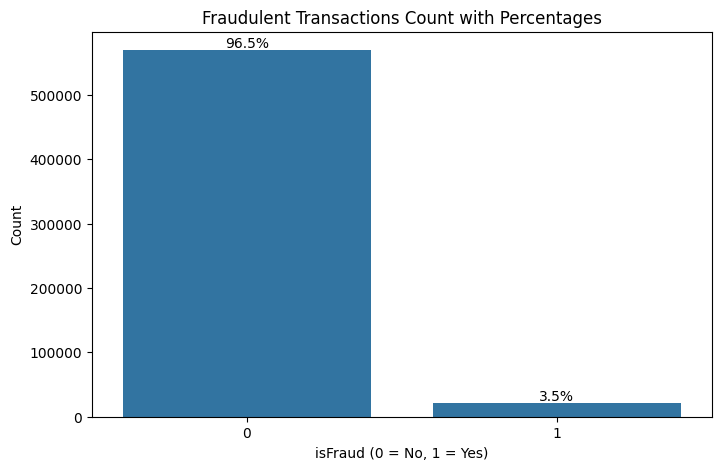

In [11]:
# Plot percentage of fraudulent transactions
plt.figure(figsize=(8,5))
ax = sns.countplot(x='isFraud', data=transaction)

# Calculate percentages and annotate the bars
total = len(transaction)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X position for the label
    y = p.get_height()  # Y position for the label
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Fraudulent Transactions Count with Percentages')
plt.xlabel('isFraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

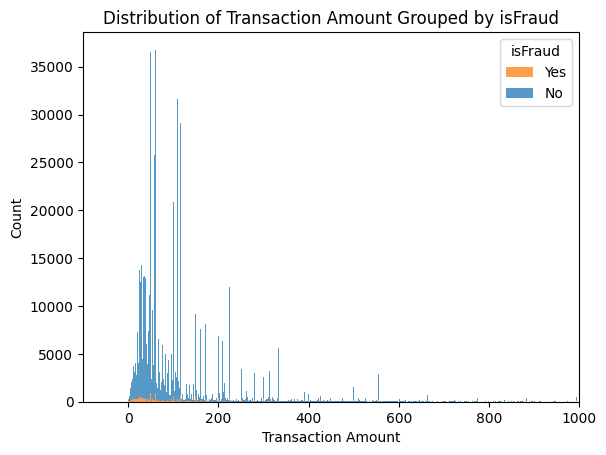

In [12]:
# Plot distribution of transaction amount grouped by isFraud
fig, ax = plt.subplots()
sns.histplot(data=transaction, x='TransactionAmt', hue='isFraud', multiple='stack')
ax.set_xlim(-100,1000)
plt.legend(title="isFraud", labels=["Yes", "No"])
plt.title("Distribution of Transaction Amount Grouped by isFraud")
plt.xlabel('Transaction Amount')
plt.show()

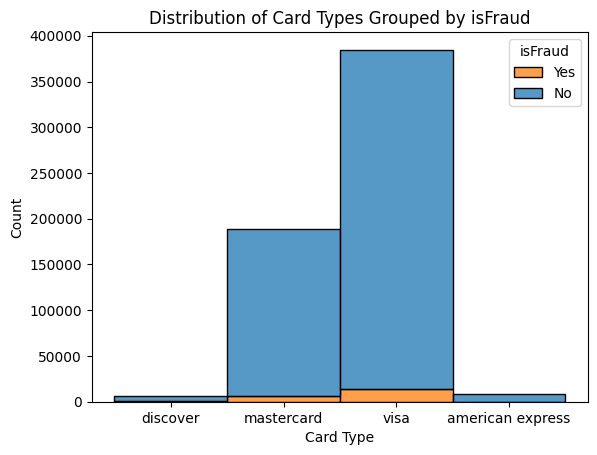

In [13]:
# Plot distribution of card types grouped by isFraud
sns.histplot(data=transaction, x='card4', hue='isFraud', multiple='stack')
plt.legend(title="isFraud", labels=["Yes", "No"])
plt.title("Distribution of Card Types Grouped by isFraud")
plt.xlabel('Card Type')
plt.show()

In [14]:
target_col = 'isFraud' 
num_cols = transaction.select_dtypes(include=['int64', 'float64']).columns.drop(target_col)
cat_cols = transaction.select_dtypes(include=['object', 'category']).columns

In [15]:
# Daytime column
transaction['day'] = np.floor((transaction['TransactionDT'] / (3600 * 24) - 1) % 7)
transaction['hour'] = np.floor(transaction['TransactionDT'] / 3600) % 24

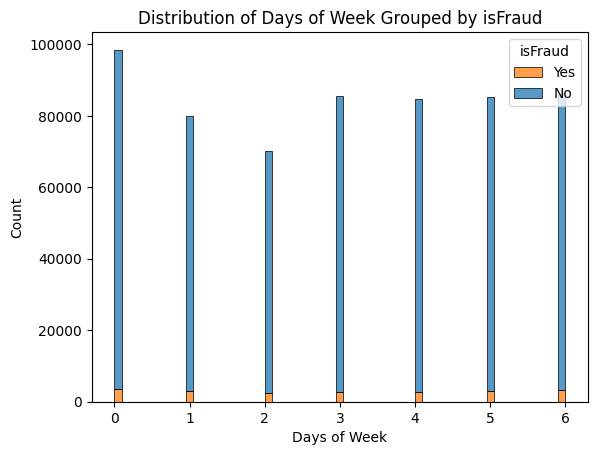

In [16]:
# Plot distribution of days of week grouped by isFraud
sns.histplot(data=transaction, x='day', hue='isFraud', multiple='stack')
plt.legend(title="isFraud", labels=["Yes", "No"])
plt.title("Distribution of Days of Week Grouped by isFraud")
plt.xlabel('Days of Week')
plt.show()

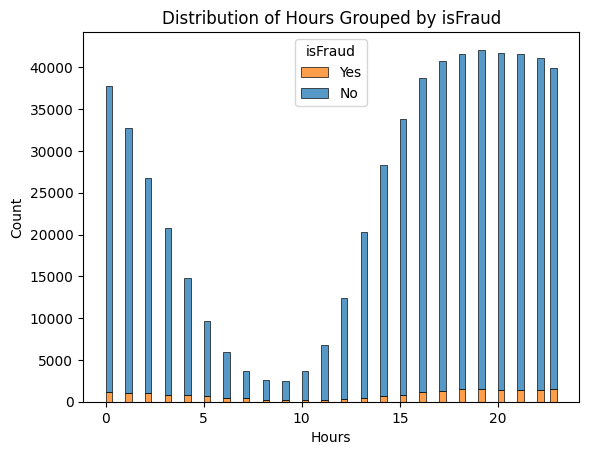

In [17]:
# Plot distribution of hours grouped by isFraud
sns.histplot(data=transaction, x='hour', hue='isFraud', multiple='stack')
plt.legend(title="isFraud", labels=["Yes", "No"])
plt.title("Distribution of Hours Grouped by isFraud")
plt.xlabel('Hours')
plt.show()

#### <span style="color:green; font-weight:bold;"> Insigts: </span>

- The majority of transaction amounts are under $1000, with 75% clustered around $125.

- There are four main credit card types: Visa, Mastercard, Discover, and American Express. Visa and Mastercard dominate large volume of transactions, with Visa usage nearly double that of Mastercard. Fraudulent transactions follow a similar distribution.

- Day of the week and hour of the day appear to have minimal impact on fraudulent transaction patterns.


In [18]:
# Print the names of all numerical columns
print("All numerical columns:")
print(num_cols.tolist())

All numerical columns:
['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97

In [19]:
# Vxxx are Vesta-engineered rich features. Let's skip them for now.
num_cols_part = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']

In [ ]:
# for testing purpose only, to be removed
df = transaction.sample(frac=0.0001, random_state=42)

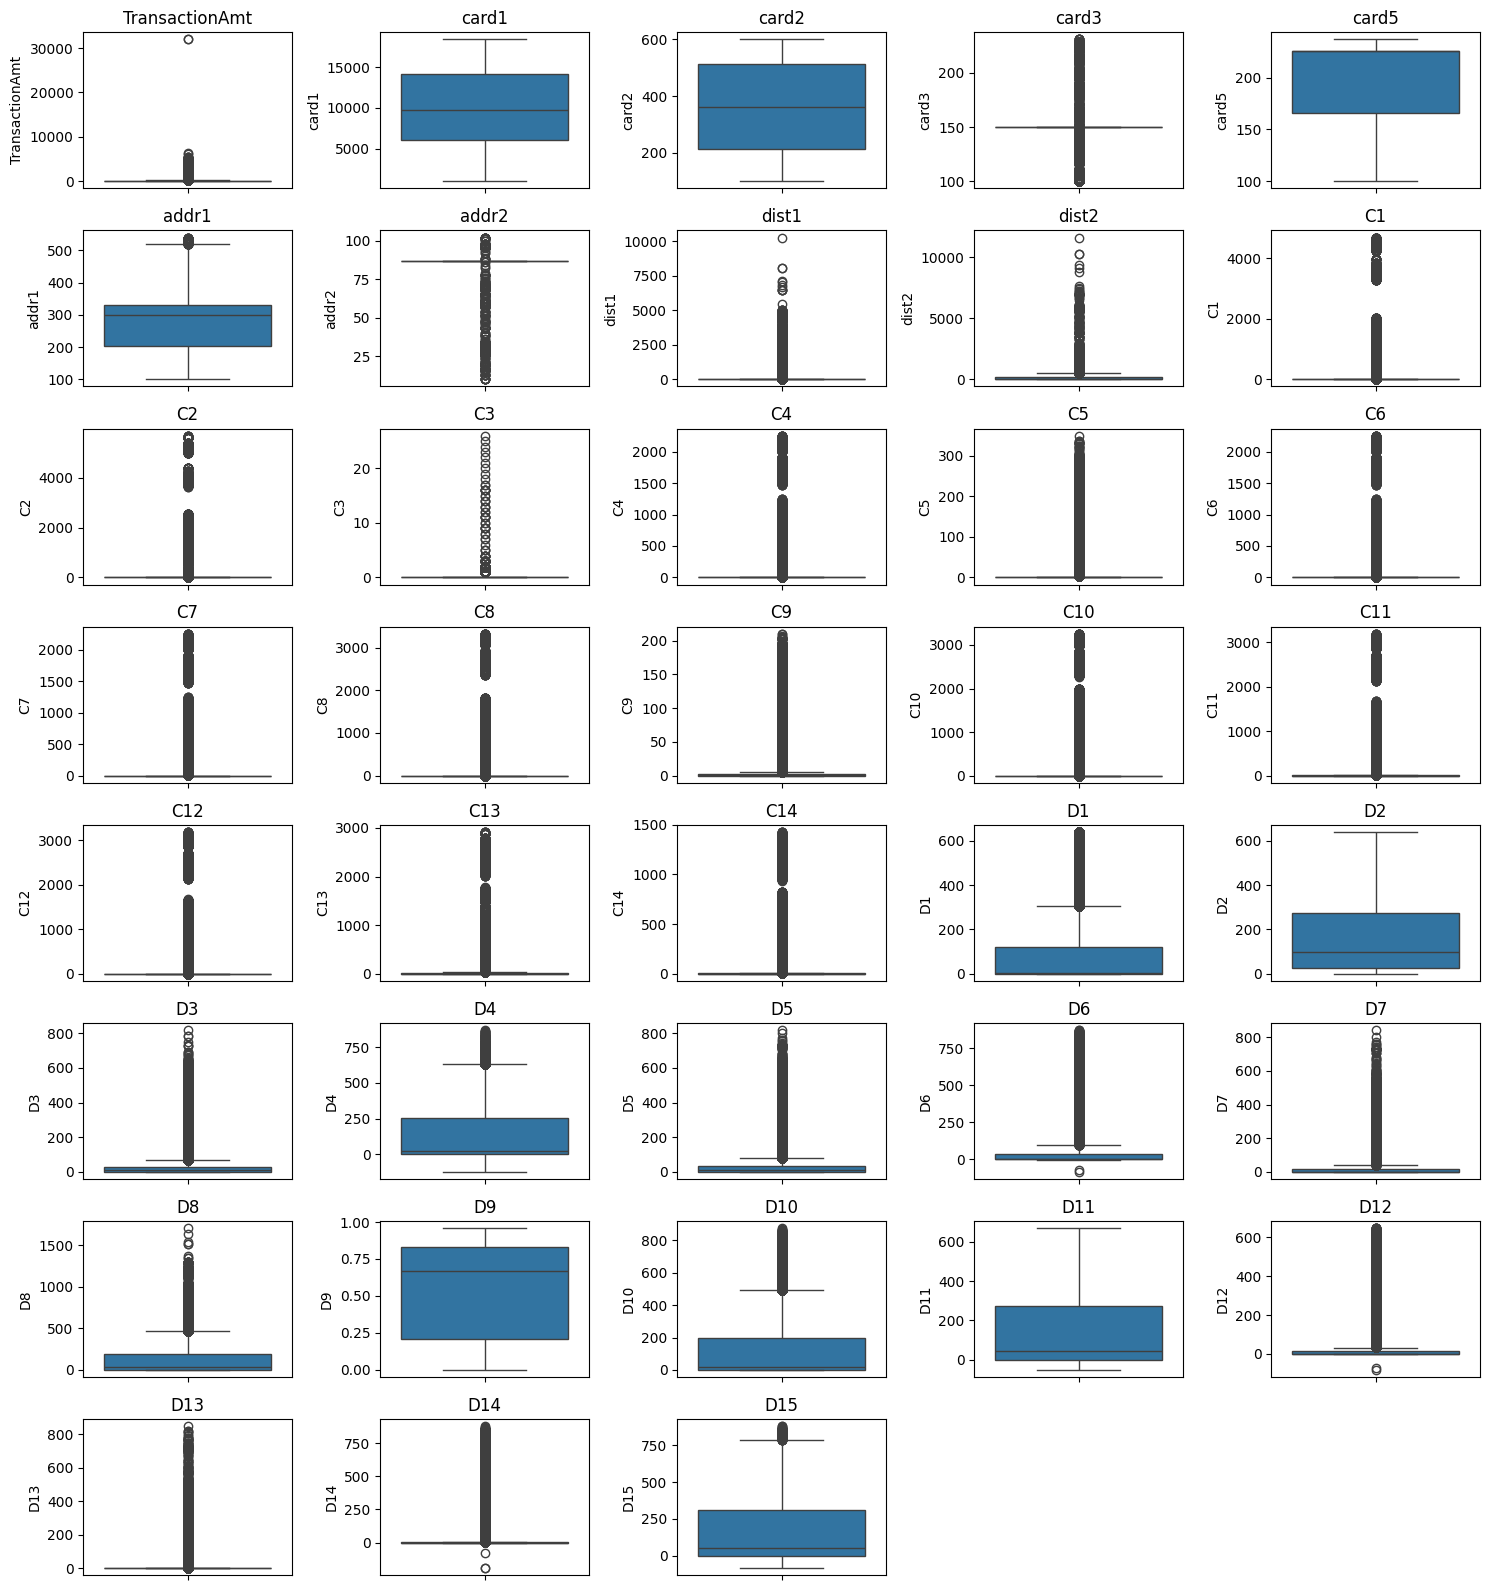

In [46]:
# Use box plots to visualize outliers in numerical features
fig, axes = plt.subplots(8, 5, figsize=(15, 16))
axes = axes.flatten()

for i, col in enumerate(num_cols_part):
    sns.boxplot(data=transaction, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Turn off remaining axes
for j in range(len(num_cols_part), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()

/var/folders/nc/clvsw_cn2752vnp4697zdz8c0000gn/T/ipykernel_1058/2162944829.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/jungao/AI-Berkeley/solutions-resources/ai-berkely-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


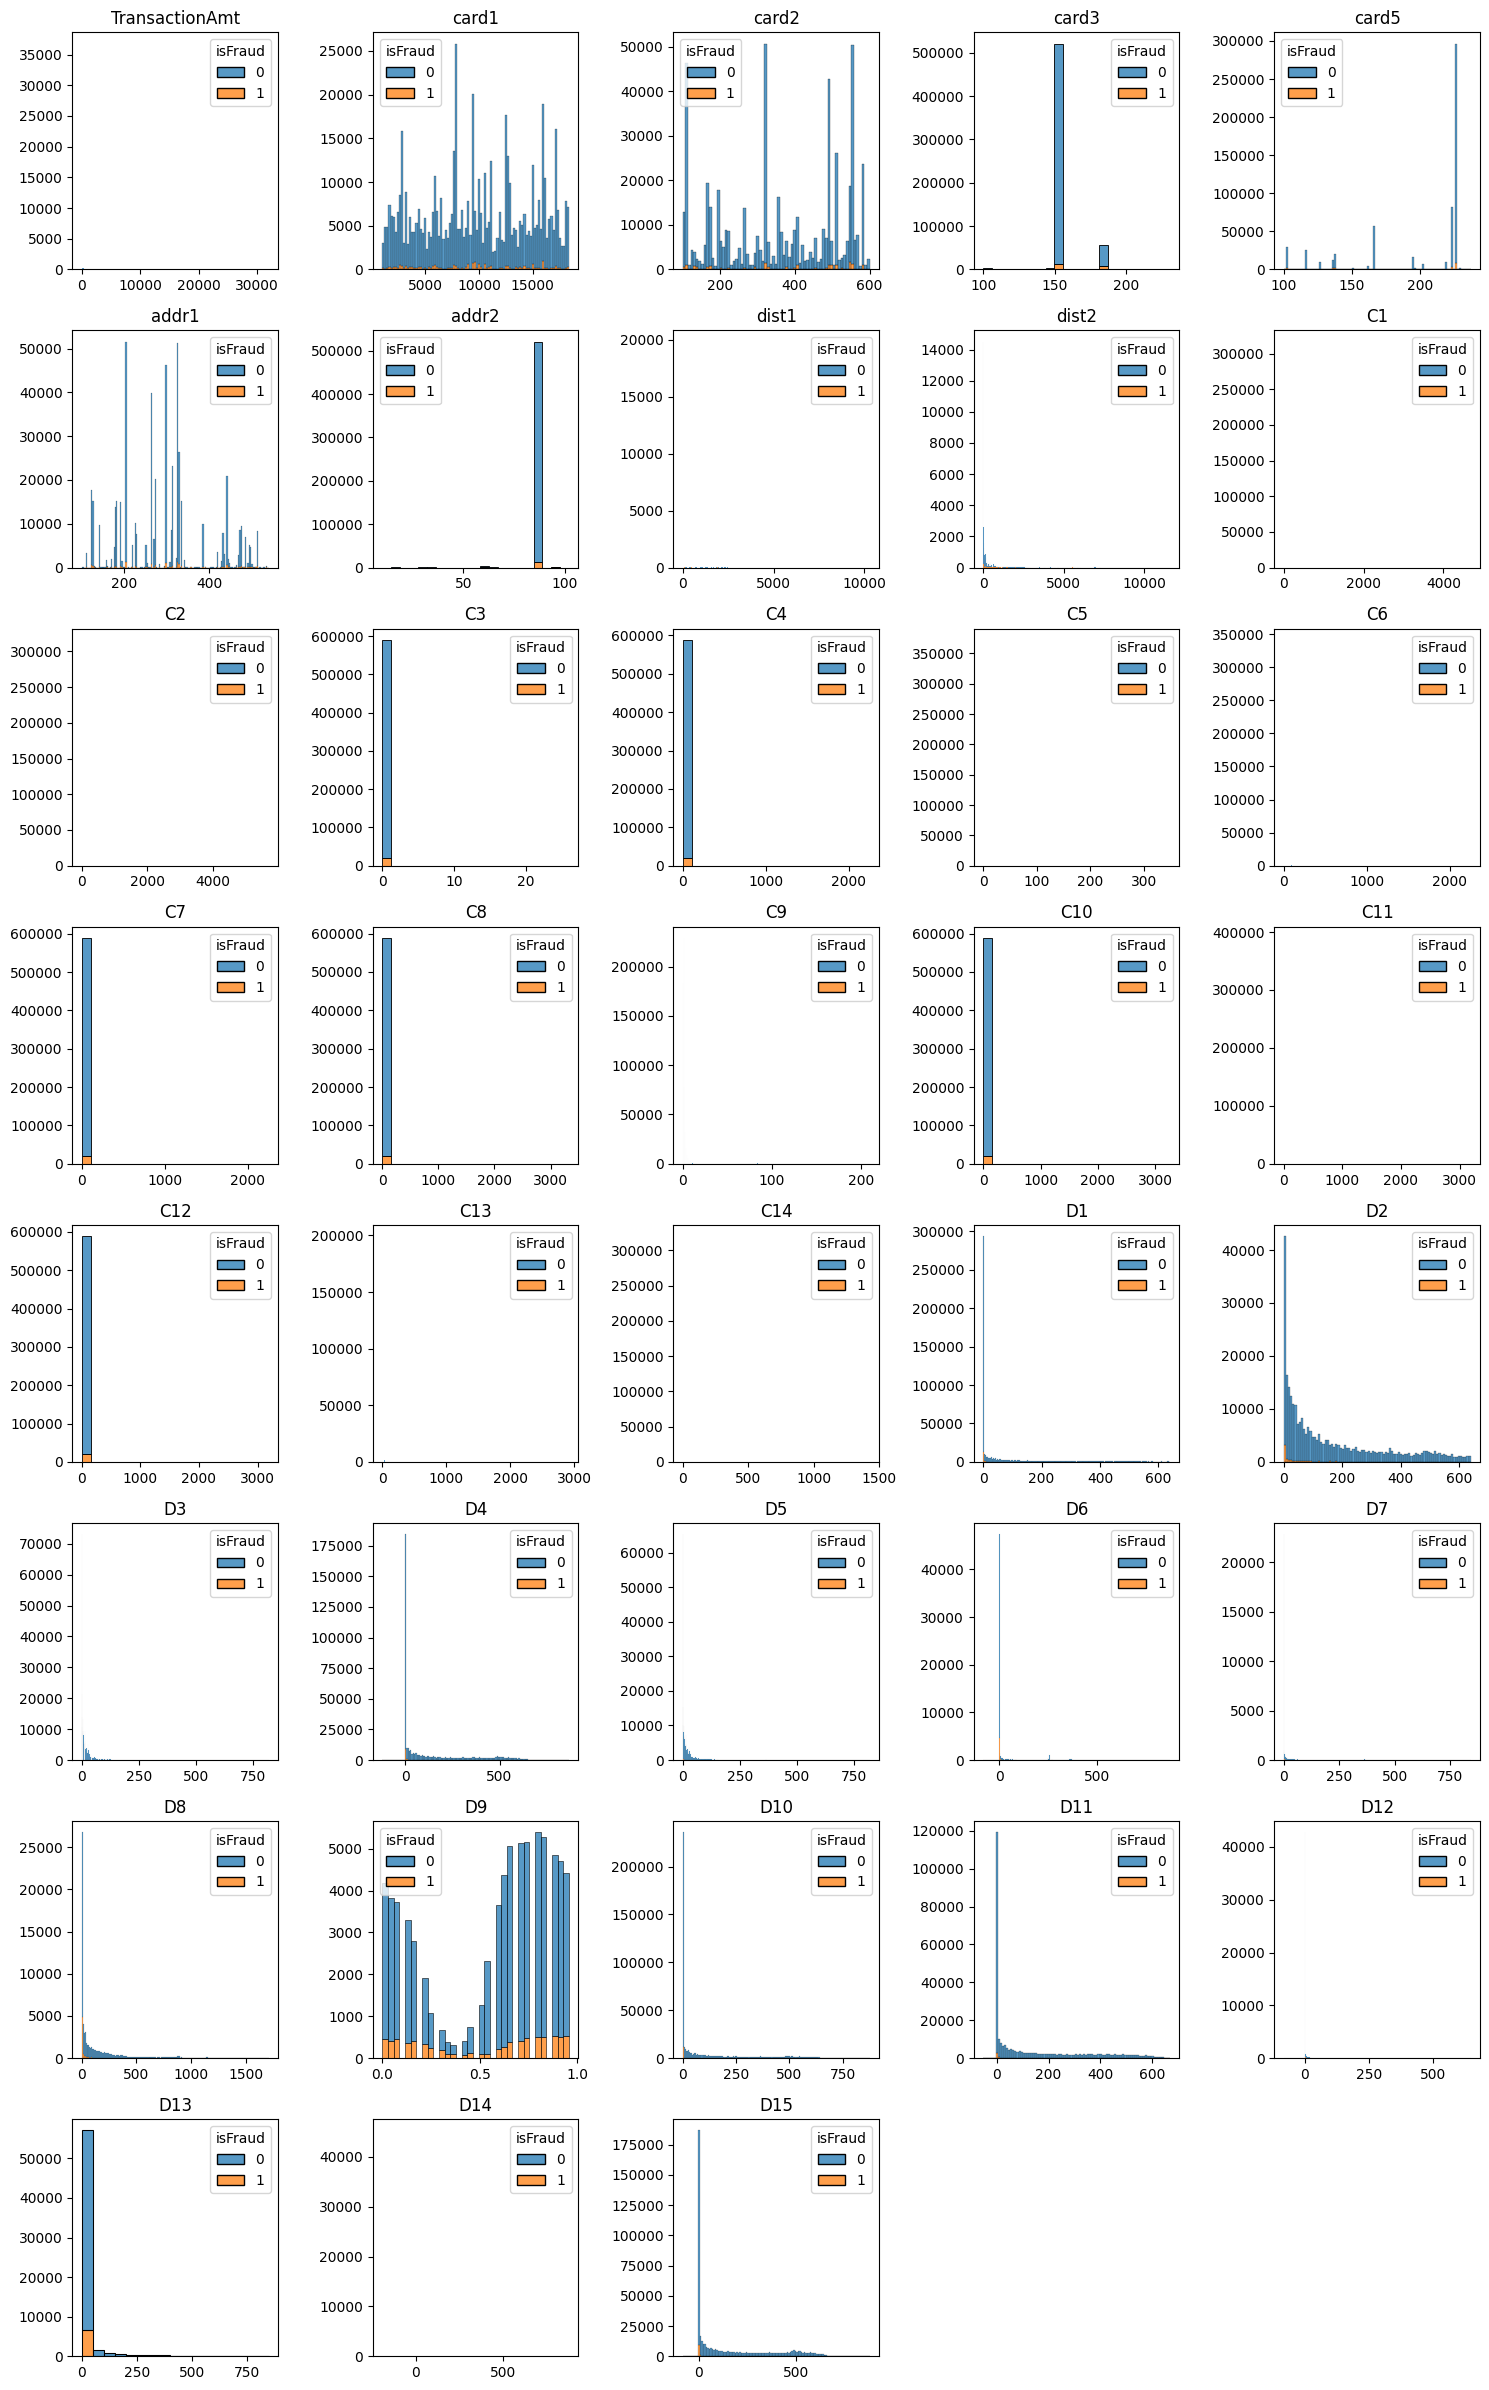

In [48]:
# Distribution of numerical features grouped by isFraud 
fig, axes = plt.subplots(8, 5, figsize=(15, 24))
axes = axes.flatten()

for i, col in enumerate(num_cols_part):
    sns.histplot(data=transaction, x=col, hue = 'isFraud', ax=axes[i], multiple='stack')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Turn off remaining axes
for j in range(len(num_cols_part), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()

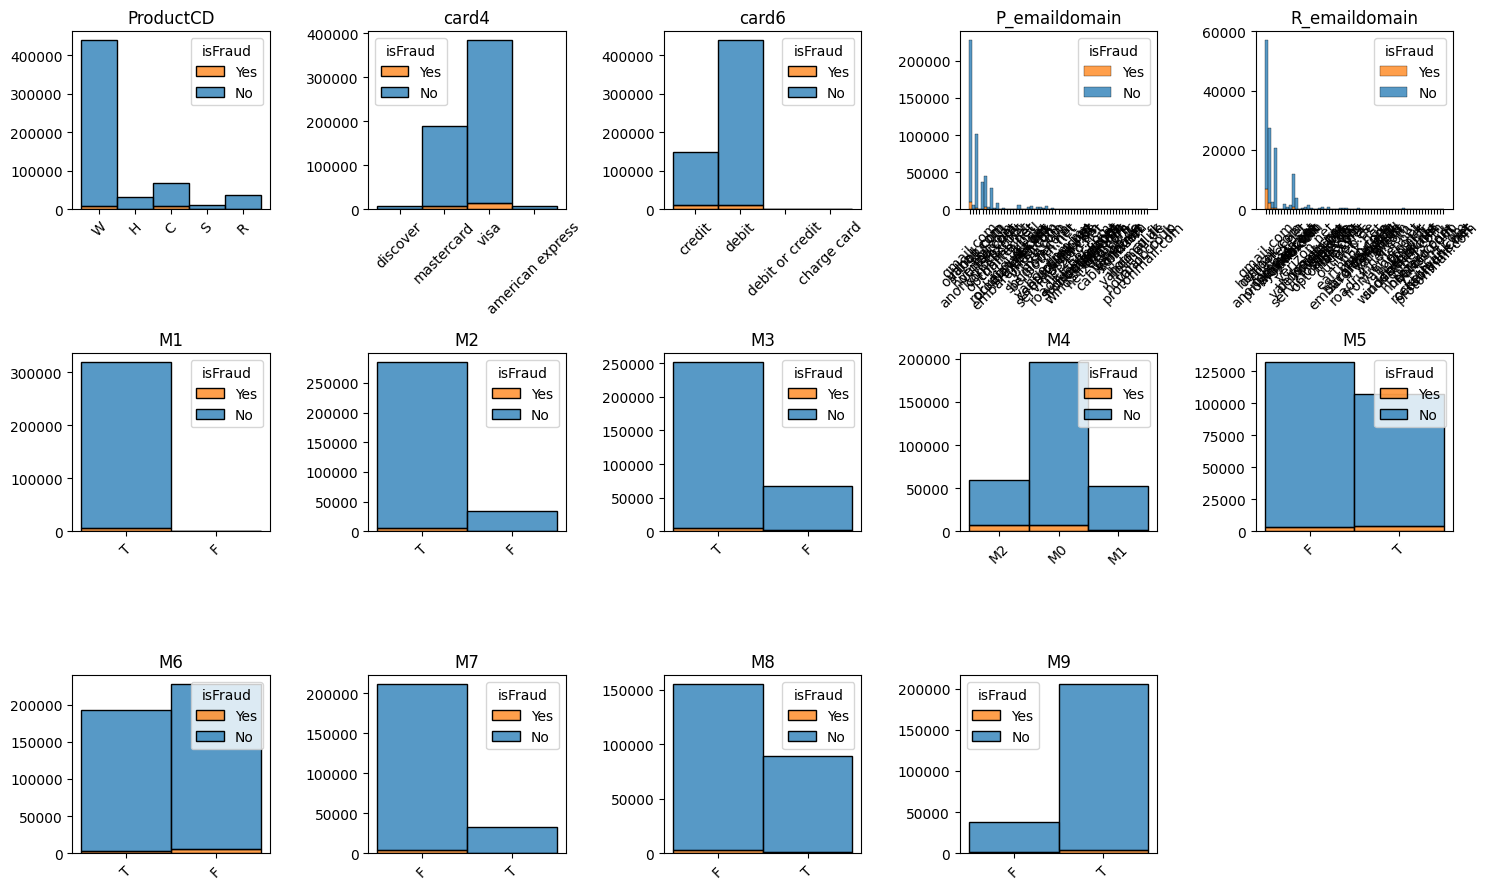

In [50]:
# Distribution of categorical features grouped by isFraud 
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.histplot(data=transaction, x=col, hue = 'isFraud', ax=axes[i], multiple='stack')
    axes[i].legend(title="isFraud", labels=["Yes", "No"])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45) 

# Turn off remaining axes
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()

#### <span style="color:green; font-weight:bold;"> Insigts: </span>

- The boxplots reveal that nearly all numerical features exhibit numerous outliers, with the exception of card1, card2, card5, D2, D9, and D11.

- Histograms of the categorical features show that fraudulent transactions are present across most of the unique labels.

- A similar pattern is observed in some numerical features, such as D9.


### Utility Functions to Analyze Correlations

In [ ]:
# Utility functions to analyze and visualize feature correlations, and 
# identify highly correlated features to dop 
def get_redundant_corr_pairs(df):
    """Return set of redundant correlation pairs (diagonal and lower triangle)."""
    cols = df.columns
    return {(cols[i], cols[j]) for i in range(len(cols)) for j in range(i + 1)}

def get_high_correlations(corr_matrix, threshold):
    """Return top absolute correlations above a given threshold."""
    abs_corr = corr_matrix.abs().unstack()
    redundant_pairs = get_redundant_corr_pairs(corr_matrix)
    filtered = abs_corr.drop(labels=redundant_pairs).sort_values(ascending=False)
    return filtered[filtered > threshold]

def plot_correlation_heatmap(df, columns, figsize):
    """Plot correlation heatmap for a given set of columns."""
    corr_matrix = df[columns].corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 4})
    return corr_matrix

def get_columns_to_drop(corr_matrix, threshold):
    """Identify columns with correlations above the threshold."""
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    return [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]

def analyze_correlation_and_prune(df, columns, threshold=0.65, figsize=(15, 15)):
    """Main function to analyze correlation and determine columns to drop."""
    corr_matrix = plot_correlation_heatmap(df, columns, figsize)
    high_related = get_high_correlations(corr_matrix, threshold)
    columns_to_drop = get_columns_to_drop(corr_matrix, threshold)
    return high_related, corr_matrix, columns_to_drop

def summarize_correlation_results(group_name, group_cols, dropped_cols):
    """Summarizes the results of a correlation-based column pruning operation."""
    kept_cols = list(set(group_cols) - set(dropped_cols))
    
    summary_dict = {
        'Group': group_name,
        'Total Columns': len(group_cols),
        'Columns': group_cols,
        'Dropped Columns': dropped_cols,
        'Num Dropped': len(dropped_cols),
        'Kept Columns': kept_cols,
        'Num Kept': len(kept_cols)
    }
    
    summary_df = pd.DataFrame([{
        'Group': group_name,
        'Total Columns': len(group_cols),
        'Num Dropped': len(dropped_cols),
        'Dropped Columns': dropped_cols,
        'Num Kept': len(kept_cols),
        'Kept Columns': kept_cols
    }])    
    return summary_dict, summary_df

CORR_THRESH = 0.6

### C-Columns

In [248]:
# C-column names
c_cols = {'C-columns': [f'C{i}' for i in range(1, 15)]}

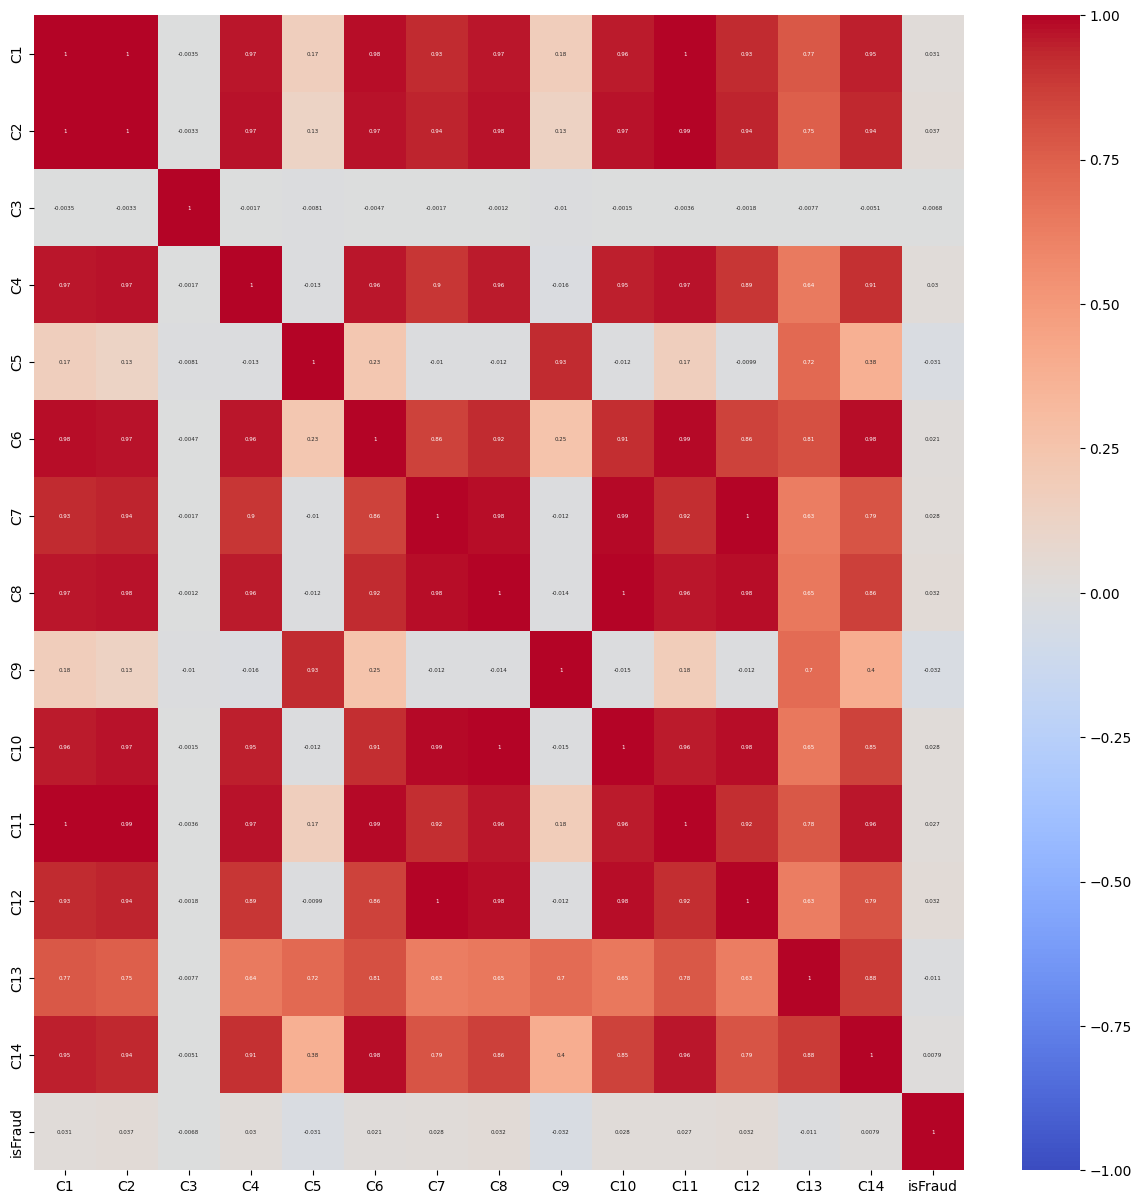

In [249]:
# Analyze the correlation within C-columns and the isFraud label
c_high_related, c_corr_matrix, c_cols_to_drop = analyze_correlation_and_prune(
    transaction, c_cols['C-columns'] + ['isFraud'], threshold=CORR_THRESH
)

In [250]:
# C-columns to drop and keep
c_result, c_result_df = summarize_correlation_results('C-columns', c_cols['C-columns'], c_cols_to_drop)
c_result_df

Group  Total Columns  Num Dropped  \
0  C-columns             14           11   

                                     Dropped Columns  Num Kept  Kept Columns  
0  [C2, C4, C6, C7, C8, C9, C10, C11, C12, C13, C14]         3  [C5, C1, C3]

### D-Columns

In [251]:
# D-column names
d_cols = {'D-columns': [f'D{i}' for i in range(1, 16)]}

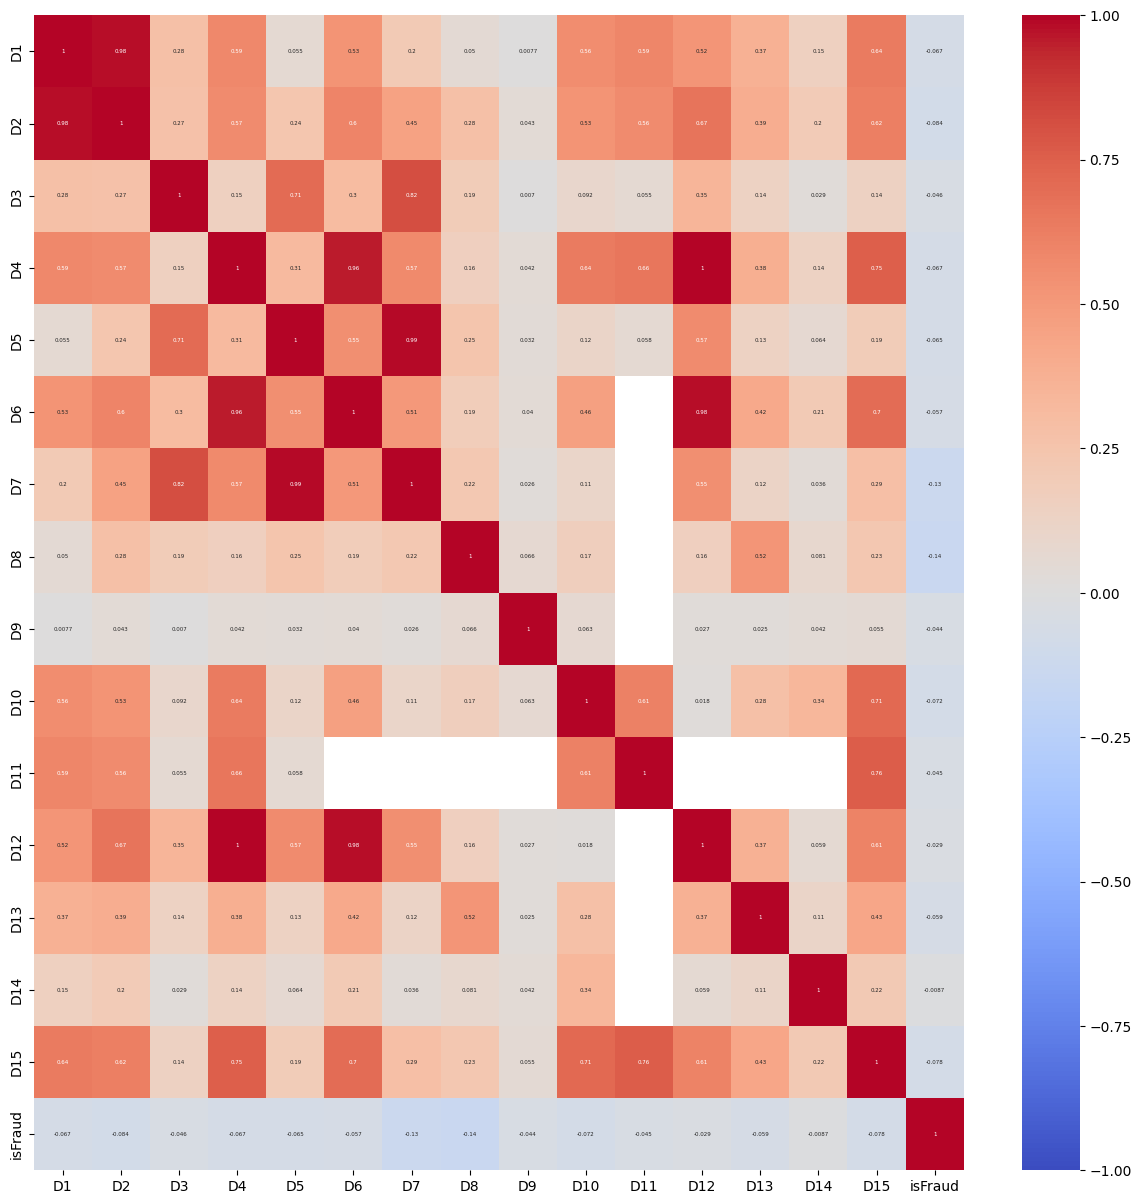

In [252]:
# Analyze the correlation within D-columns and the isFraud label
d_high_related, d_corr_matrix, d_cols_to_drop = analyze_correlation_and_prune(
    transaction, d_cols['D-columns'] + ['isFraud'], threshold=CORR_THRESH
)

In [253]:
# D-columns to drop and keep
d_result, d_result_df = summarize_correlation_results('D-columns', d_cols['D-columns'], d_cols_to_drop)
d_result_df

Group  Total Columns  Num Dropped  \
0  D-columns             15            8   

                        Dropped Columns  Num Kept  \
0  [D2, D5, D6, D7, D10, D11, D12, D15]         7   

                     Kept Columns  
0  [D1, D8, D13, D14, D9, D4, D3]

### M-Columns (Categorical)

In [180]:
# M-column names
m_cols = {'M-columns': [f'M{i}' for i in range(1, 10)]}

In [184]:
# Encode M-columns
label_map = {'F': 0, 'T': 1, 'M0': 0, 'M1': 1, 'M2': 2}
for col in m_cols['M-columns']: 
  transaction[col] = transaction[col].map(label_map)

In [185]:
# View encoded M-columns
transaction[m_cols['M-columns']]

M1   M2   M3   M4   M5   M6   M7   M8   M9
0       1.0  1.0  1.0  2.0  0.0  1.0  NaN  NaN  NaN
1       NaN  NaN  NaN  0.0  1.0  1.0  NaN  NaN  NaN
2       1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3       NaN  NaN  NaN  0.0  1.0  0.0  NaN  NaN  NaN
4       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...     ...  ...  ...  ...  ...  ...  ...  ...  ...
590535  1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0
590536  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
590537  1.0  0.0  0.0  NaN  NaN  1.0  NaN  NaN  NaN
590538  1.0  1.0  1.0  0.0  0.0  1.0  NaN  NaN  NaN
590539  1.0  0.0  0.0  NaN  NaN  1.0  0.0  0.0  0.0

[590540 rows x 9 columns]

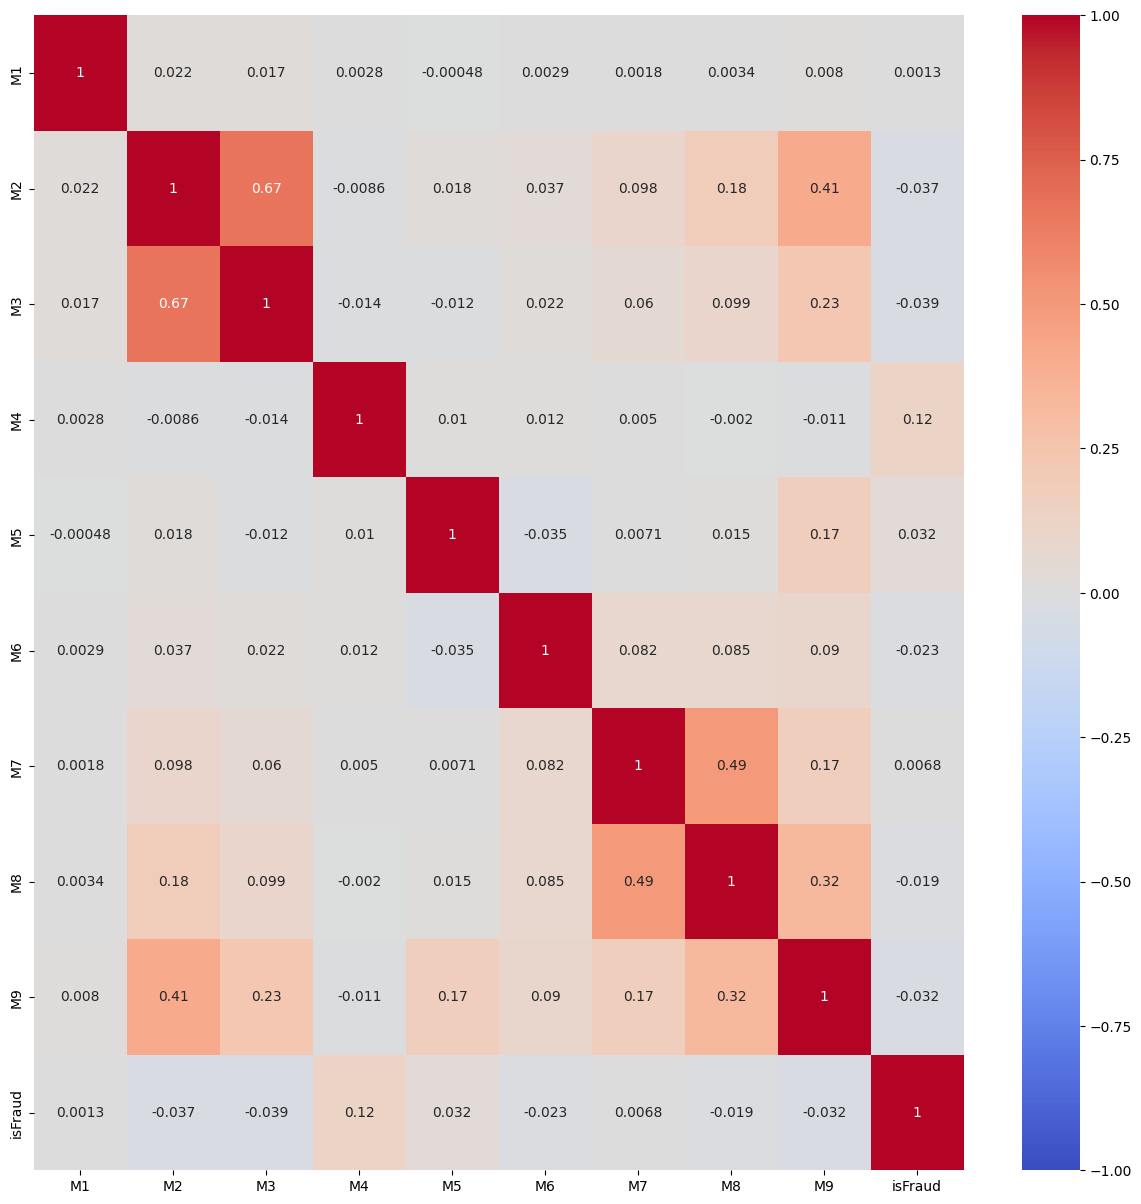

In [186]:
# Analyze the correlation within M-columns and the isFraud label
m_high_related, m_corr_matrix, m_cols_to_drop = analyze_correlation_and_prune(
    transaction, m_cols['M-columns'] + ['isFraud'], threshold=CORR_THRESH
)

In [187]:
# M-columns to drop and keep
m_result, m_result_df = summarize_correlation_results('M-columns', m_cols['M-columns'], m_cols_to_drop)
m_result_df

Group  Total Columns  Num Dropped Dropped Columns  Num Kept  \
0  M-columns              9            1            [M3]         8   

                       Kept Columns  
0  [M4, M2, M8, M6, M7, M9, M1, M5]

### V-Columns (339 Numerical Columns)

In [157]:
# dataframe with only V columns
df_v = transaction.iloc[:, 55:394]
df_v.head()

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  ...  V330  V331  V332  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   NaN   NaN   NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   NaN   NaN   NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   0.0   0.0   0.0   

   V333  V334  V335  V336  V337  V338  V339  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 339 columns]

In [158]:
# testing purpose only, to be removed
sample_v = df_v.sample(frac=0.0001, random_state=42)

In [ ]:
# V-column names
v_cols = [f'V{i}' for i in range(1, 340)]

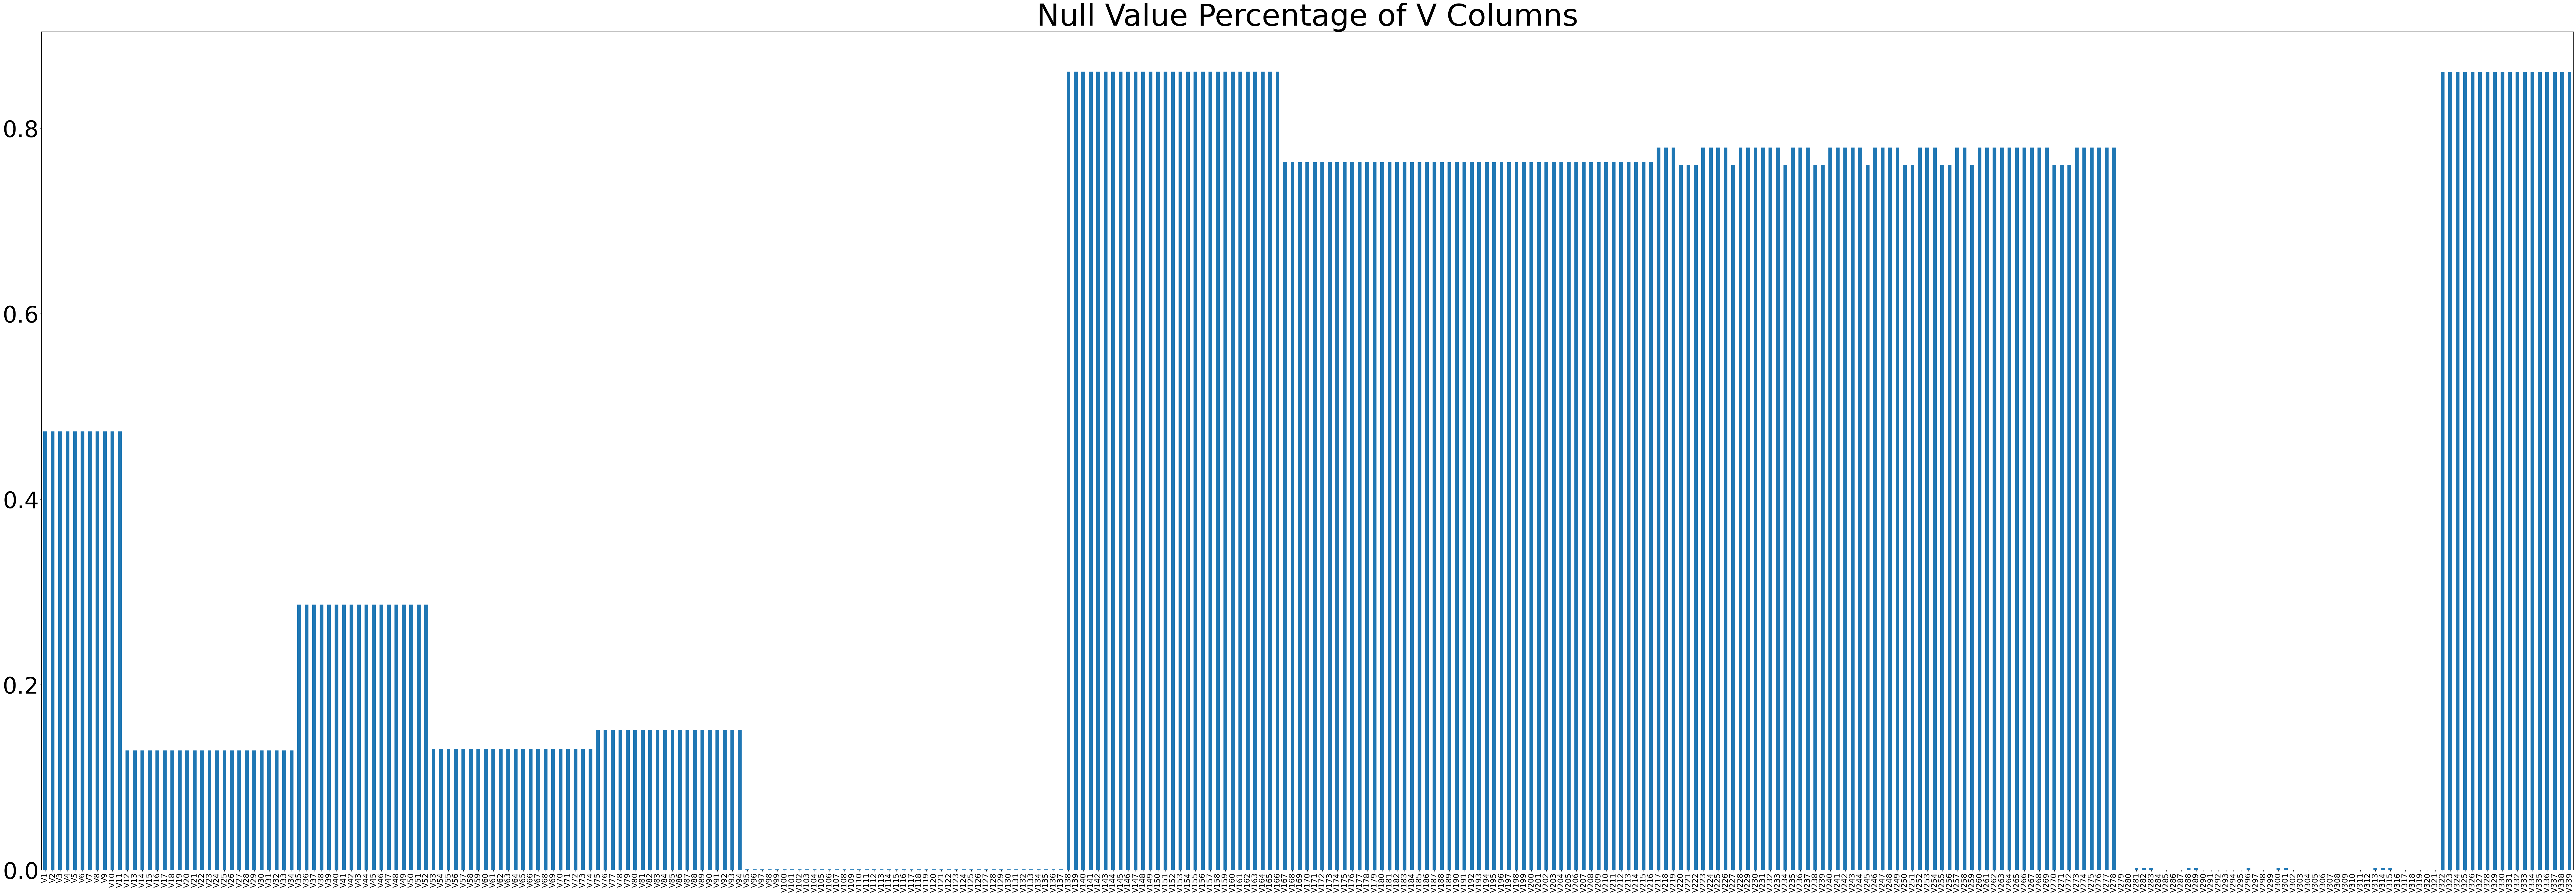

In [160]:
percent_null = df_v.isna().sum()/df_v.shape[0]
plt.figure(figsize=(120,40))
percent_null[v_cols].plot(kind='bar')
plt.title("Null Value Percentage of V Columns", fontsize=80)
plt.xticks(fontsize=20)
plt.yticks(fontsize=60)
plt.show()

In [ ]:
# Divide V columns to 11 groups based on the null value percentages
v_ranges = {
    'group1': (1, 12),
    'group2': (12, 35),
    'group3': (35, 53),
    'group4': (53, 75),
    'group5': (75, 95),
    'group6': (95, 138),
    'group7': (138, 167),
    'group8': (167, 217),
    'group9': (217, 279),
    'group10': (279, 322),
    'group11': (322, 340),
}

v_groups = {k: [f'V{i}' for i in range(start, end)] for k, (start, end) in v_ranges.items()}

In [162]:
# Plot V-column null value percentages bt groups 
fig, axes = plt.subplots(3, 4, figsize = (120,60))
axes =axes.flatten()

for name, ax in zip(v_groups.keys(), axes):
  percent_null[v_groups[name]].plot(ax=ax, kind='bar')
  ax.tick_params(axis='both', which='major', labelsize=40)

# Turn off remaining axes
for j in range(len(v_groups.keys()), len(axes)):
    fig.delaxes(axes[j]) 

fig.tight_layout()
fig.suptitle('V-columns Groups', y=1.1, fontsize=100)
fig.subplots_adjust(top=1.08)
fig.show()

In [ ]:
# testing purpose only, to be removed
df2=transaction.sample(frac=0.01)

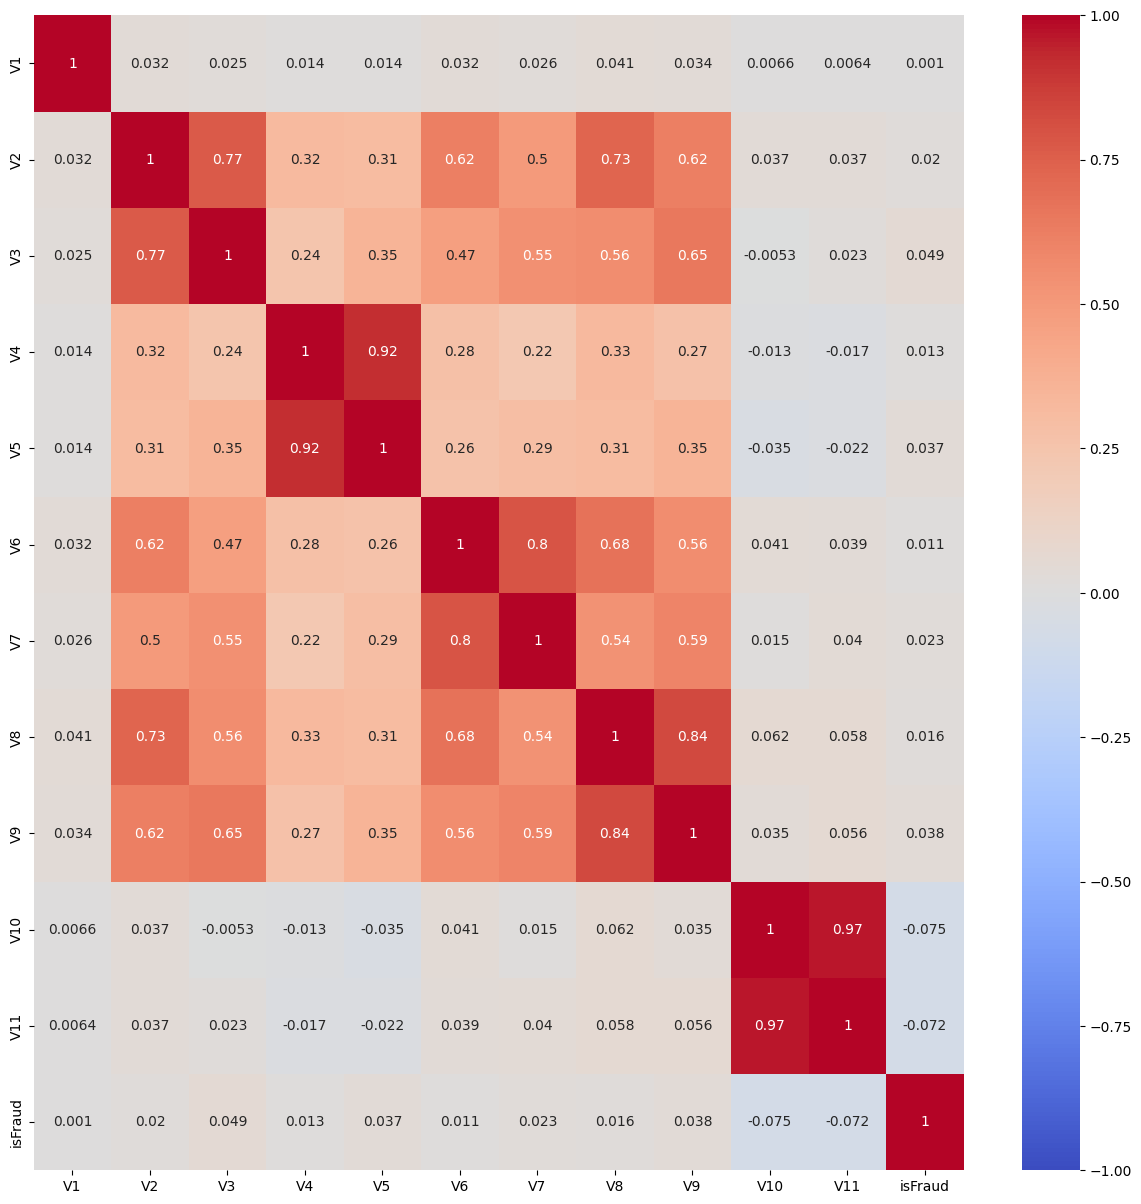

In [ ]:
# Analyze the correlation within group1 of the V-columns and the isFraud label
group1_high_related, group1_corr_matrix, group1_cols_to_drop = analyze_correlation_and_prune(
    transaction, v_groups['group1'] + ['isFraud'], threshold=CORR_THRESH
)

In [188]:
# group1 columns to drop and keep
v_group1_result, v_group1_result_df = summarize_correlation_results('group1', v_groups['group1'], group1_cols_to_drop)
v_group1_result_df

Group  Total Columns  Num Dropped                Dropped Columns  \
0  group1             11            7  [V3, V5, V6, V7, V8, V9, V11]   

   Num Kept       Kept Columns  
0         4  [V1, V2, V10, V4]

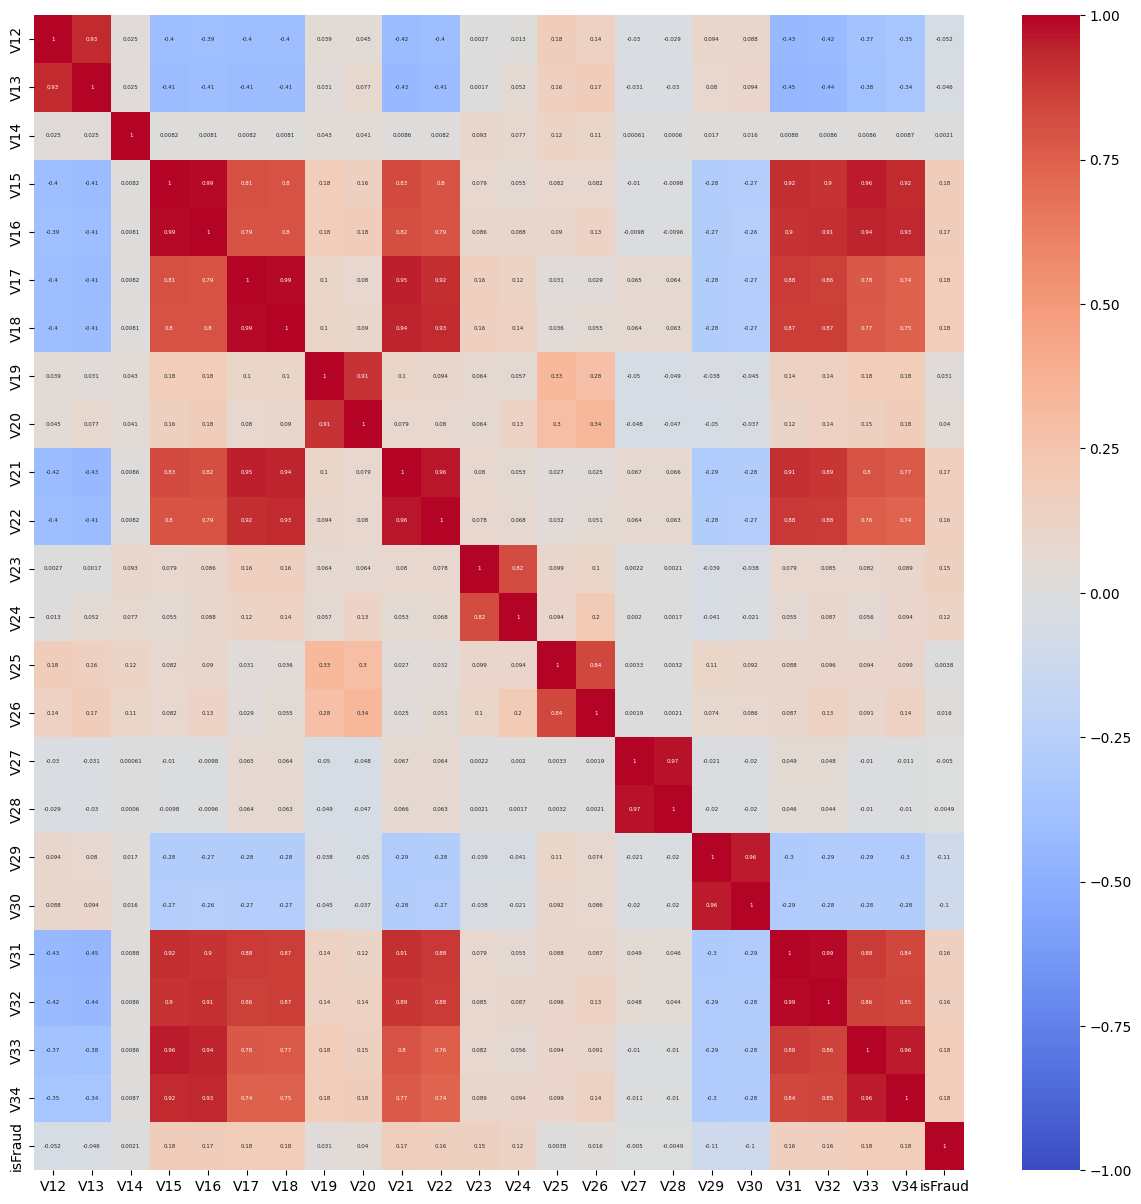

In [221]:
# Analyze the correlation within group2 of the V-columns and the isFraud label
group2_high_related, group2_corr_matrix, group2_cols_to_drop = analyze_correlation_and_prune(
    transaction, v_groups['group2'] + ['isFraud'], threshold=CORR_THRESH
)

In [190]:
# group2 columns to drop and keep
v_group2_result, v_group2_result_df = summarize_correlation_results('group2', v_groups['group2'], group2_cols_to_drop)
v_group2_result_df

Group  Total Columns  Num Dropped  \
0  group2             23           15   

                                     Dropped Columns  Num Kept  \
0  [V13, V16, V17, V18, V20, V21, V22, V24, V26, ...         8   

                               Kept Columns  
0  [V19, V12, V29, V25, V15, V27, V23, V14]

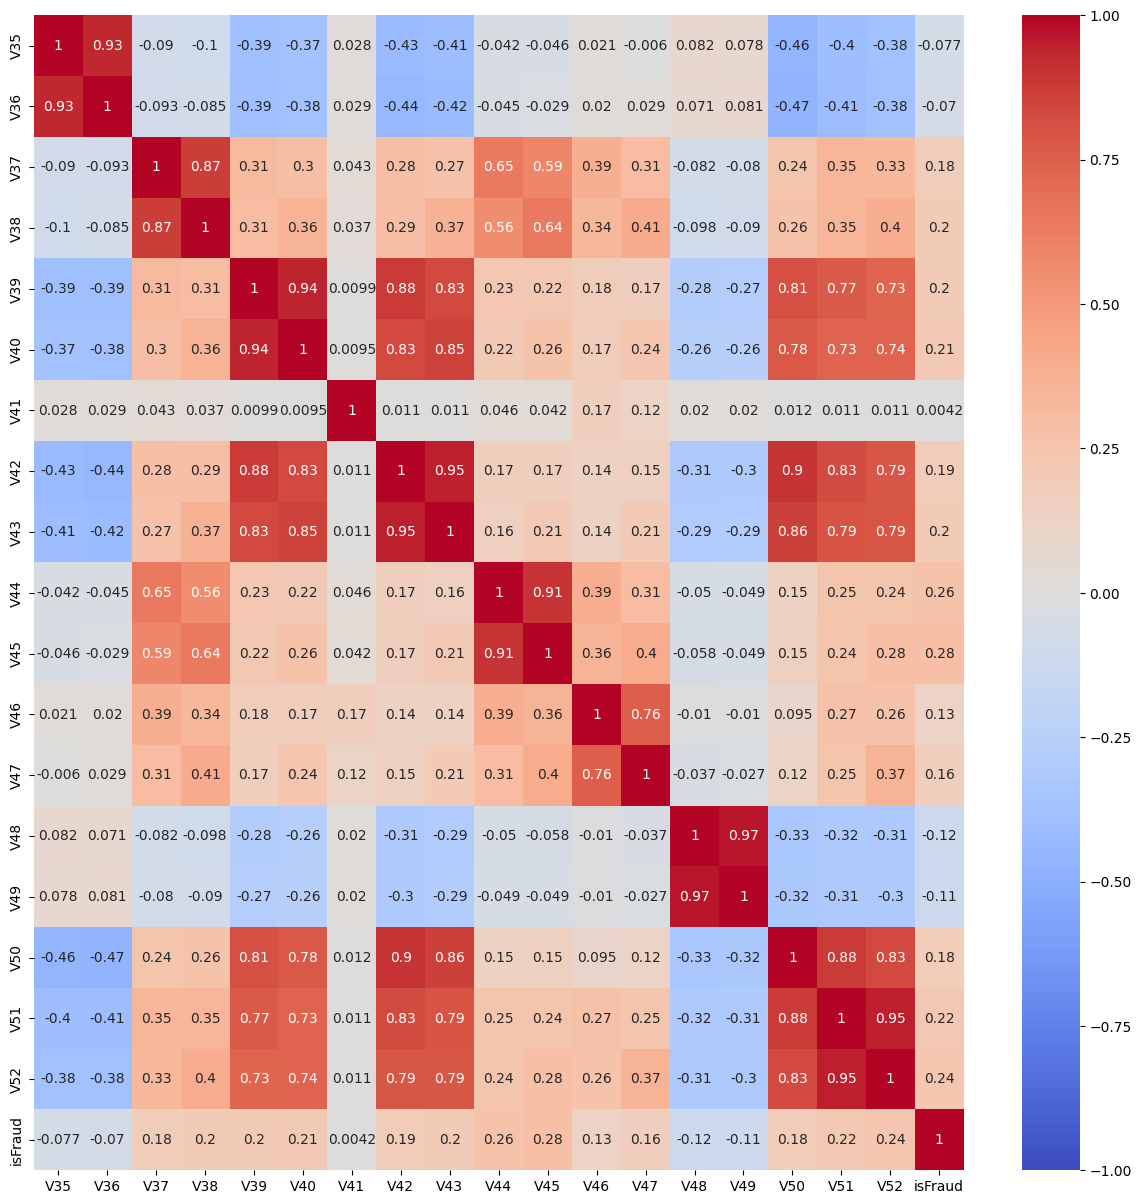

In [191]:
# Analyze the correlation within group3 of the V-columns and the isFraud label
group3_high_related, group3_corr_matrix, group3_cols_to_drop = analyze_correlation_and_prune(
    transaction, v_groups['group3'] + ['isFraud'], threshold=CORR_THRESH
)

In [192]:
# group3 columns to drop and keep
v_group3_result, v_group3_result_df = summarize_correlation_results('group3', v_groups['group3'], group3_cols_to_drop)
v_group3_result_df

Group  Total Columns  Num Dropped  \
0  group3             18           12   

                                     Dropped Columns  Num Kept  \
0  [V36, V38, V40, V42, V43, V44, V45, V47, V49, ...         6   

                     Kept Columns  
0  [V48, V37, V35, V39, V46, V41]

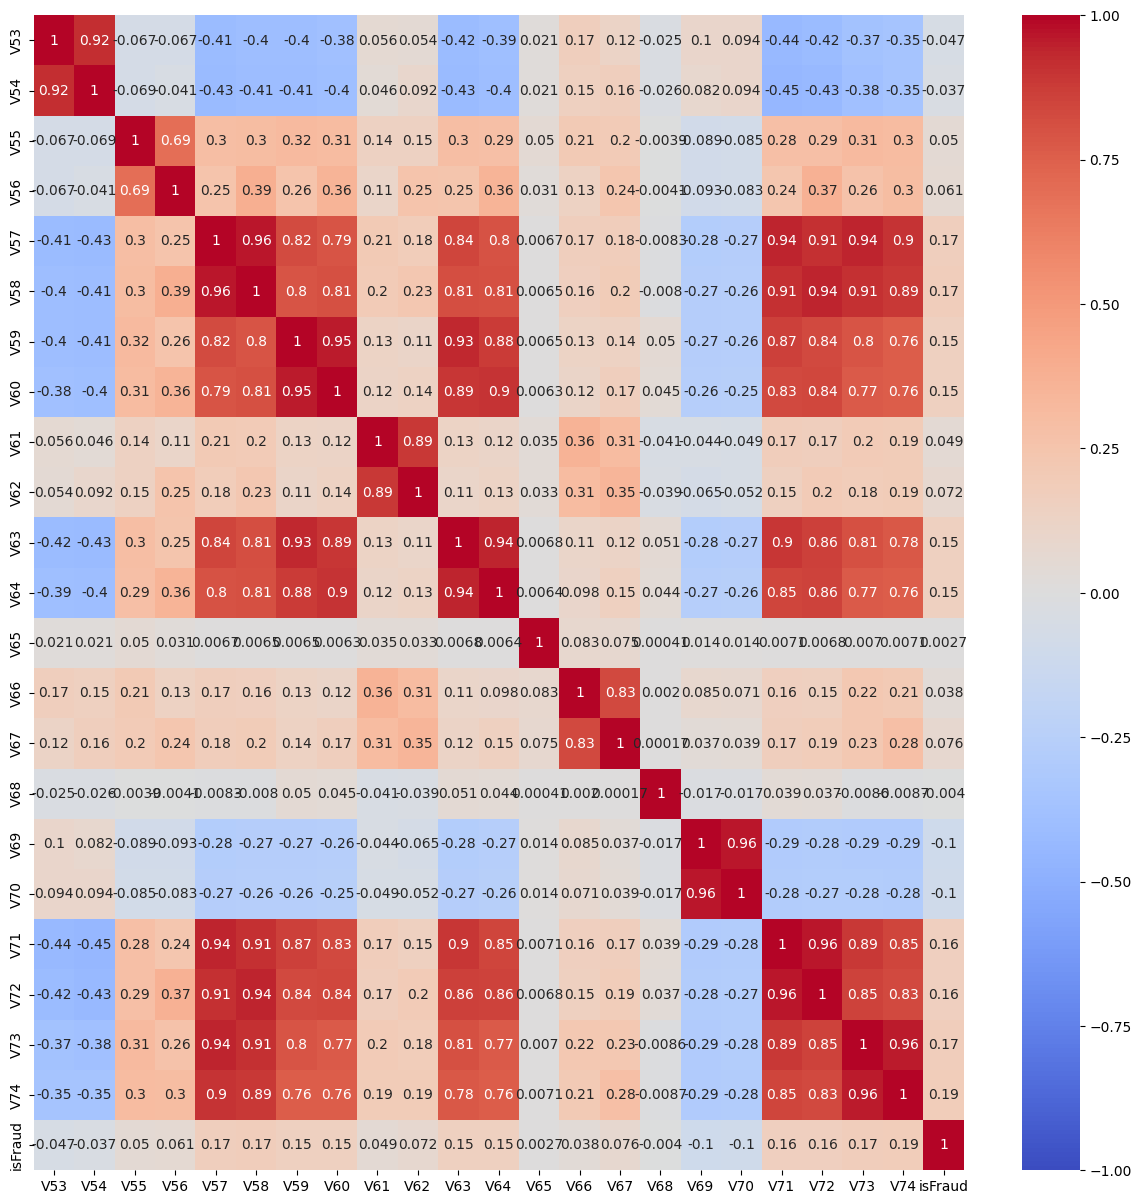

In [193]:
# Analyze the correlation within group4 of the V-columns and the isFraud label
group4_high_related, group4_corr_matrix, group4_cols_to_drop = analyze_correlation_and_prune(
    transaction, v_groups['group4'] + ['isFraud'], threshold=CORR_THRESH
)

In [194]:
# group4 columns to drop and keep
v_group4_result, v_group4_result_df = summarize_correlation_results('group4', v_groups['group4'], group4_cols_to_drop)
v_group4_result_df

Group  Total Columns  Num Dropped  \
0  group4             22           14   

                                     Dropped Columns  Num Kept  \
0  [V54, V56, V58, V59, V60, V62, V63, V64, V67, ...         8   

                               Kept Columns  
0  [V55, V65, V53, V66, V61, V57, V69, V68]

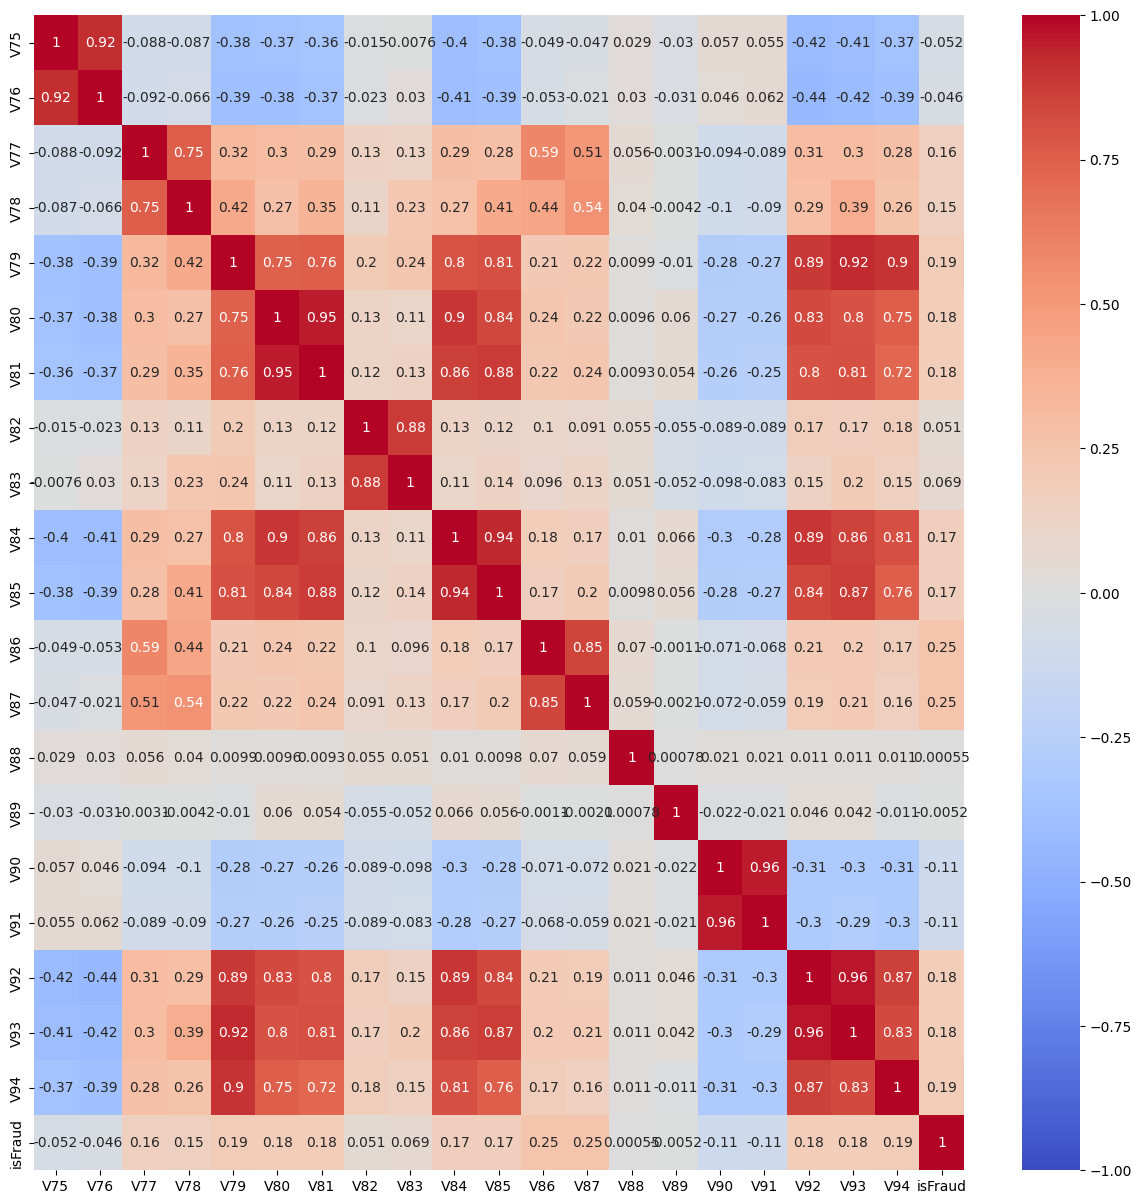

In [195]:
# Analyze the correlation within group5 of the V-columns and the isFraud label
group5_high_related, group5_corr_matrix, group5_cols_to_drop = analyze_correlation_and_prune(
    transaction, v_groups['group5'] + ['isFraud'], threshold=CORR_THRESH
)

In [196]:
# group5 columns to drop and keep
v_group5_result, v_group5_result_df = summarize_correlation_results('group5', v_groups['group5'], group5_cols_to_drop)
v_group5_result_df

Group  Total Columns  Num Dropped  \
0  group5             20           12   

                                     Dropped Columns  Num Kept  \
0  [V76, V78, V80, V81, V83, V84, V85, V87, V91, ...         8   

                               Kept Columns  
0  [V75, V90, V86, V79, V82, V88, V89, V77]

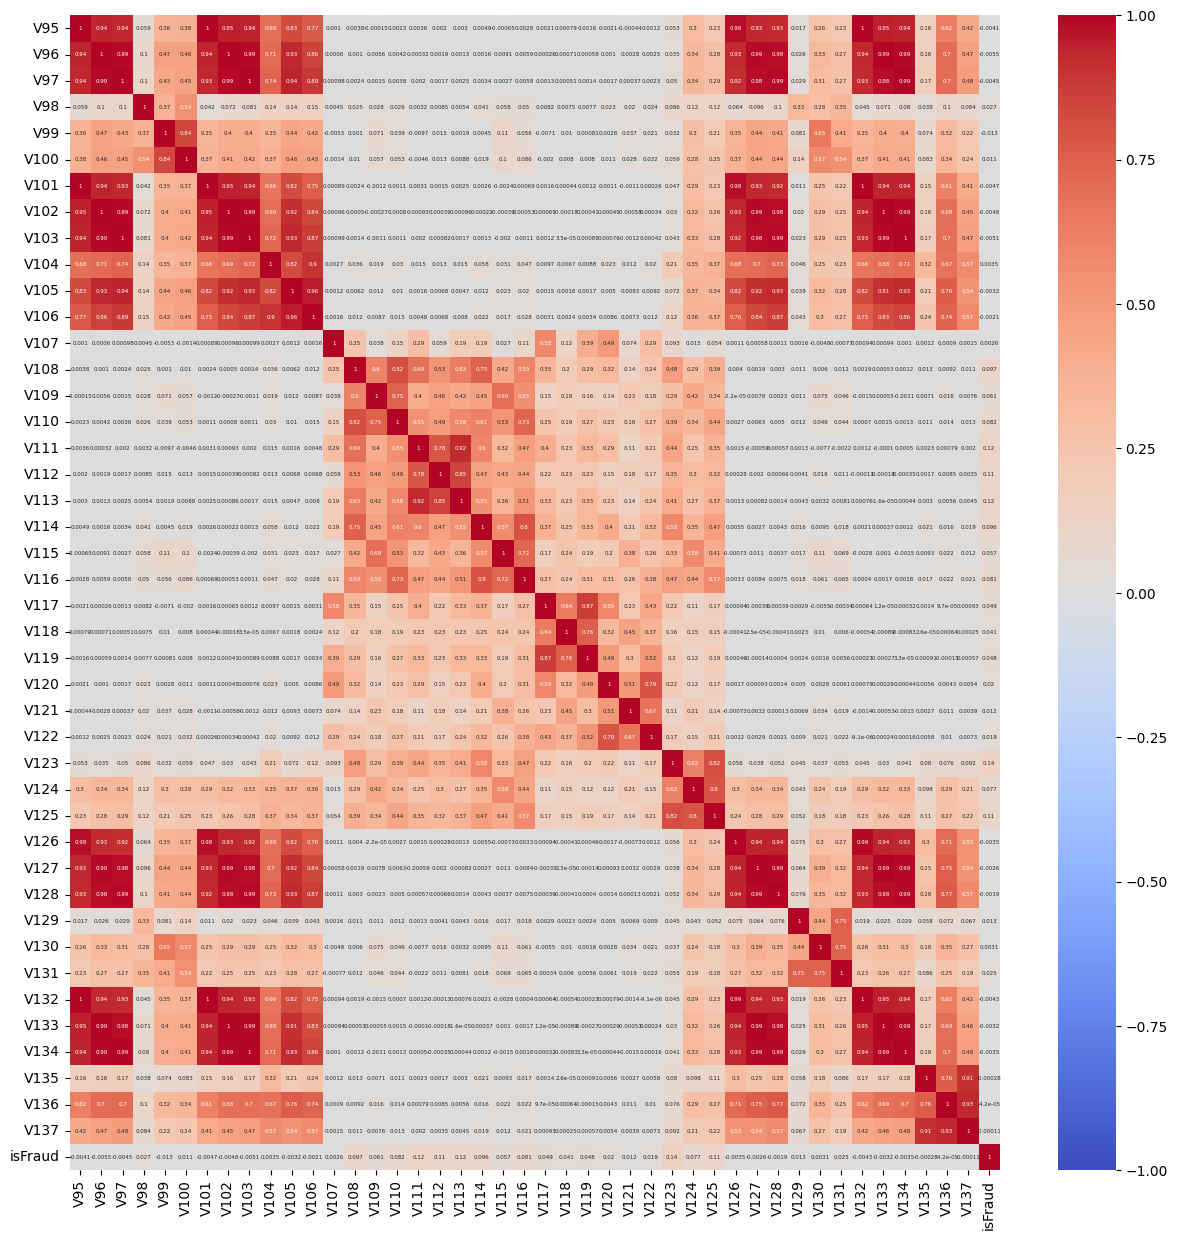

In [216]:
# Analyze the correlation within group6 of the V-columns and the isFraud label
group6_high_related, group6_corr_matrix, group6_cols_to_drop = analyze_correlation_and_prune(
    transaction, v_groups['group6'] + ['isFraud'], threshold=CORR_THRESH
)

In [198]:
# group6 columns to drop and keep
v_group6_result, v_group6_result_df = summarize_correlation_results('group6', v_groups['group6'], group6_cols_to_drop)
v_group6_result_df

Group  Total Columns  Num Dropped  \
0  group6             43           32   

                                     Dropped Columns  Num Kept  \
0  [V96, V97, V100, V101, V102, V103, V104, V105,...        11   

                                        Kept Columns  
0  [V107, V108, V123, V99, V121, V95, V129, V117,...

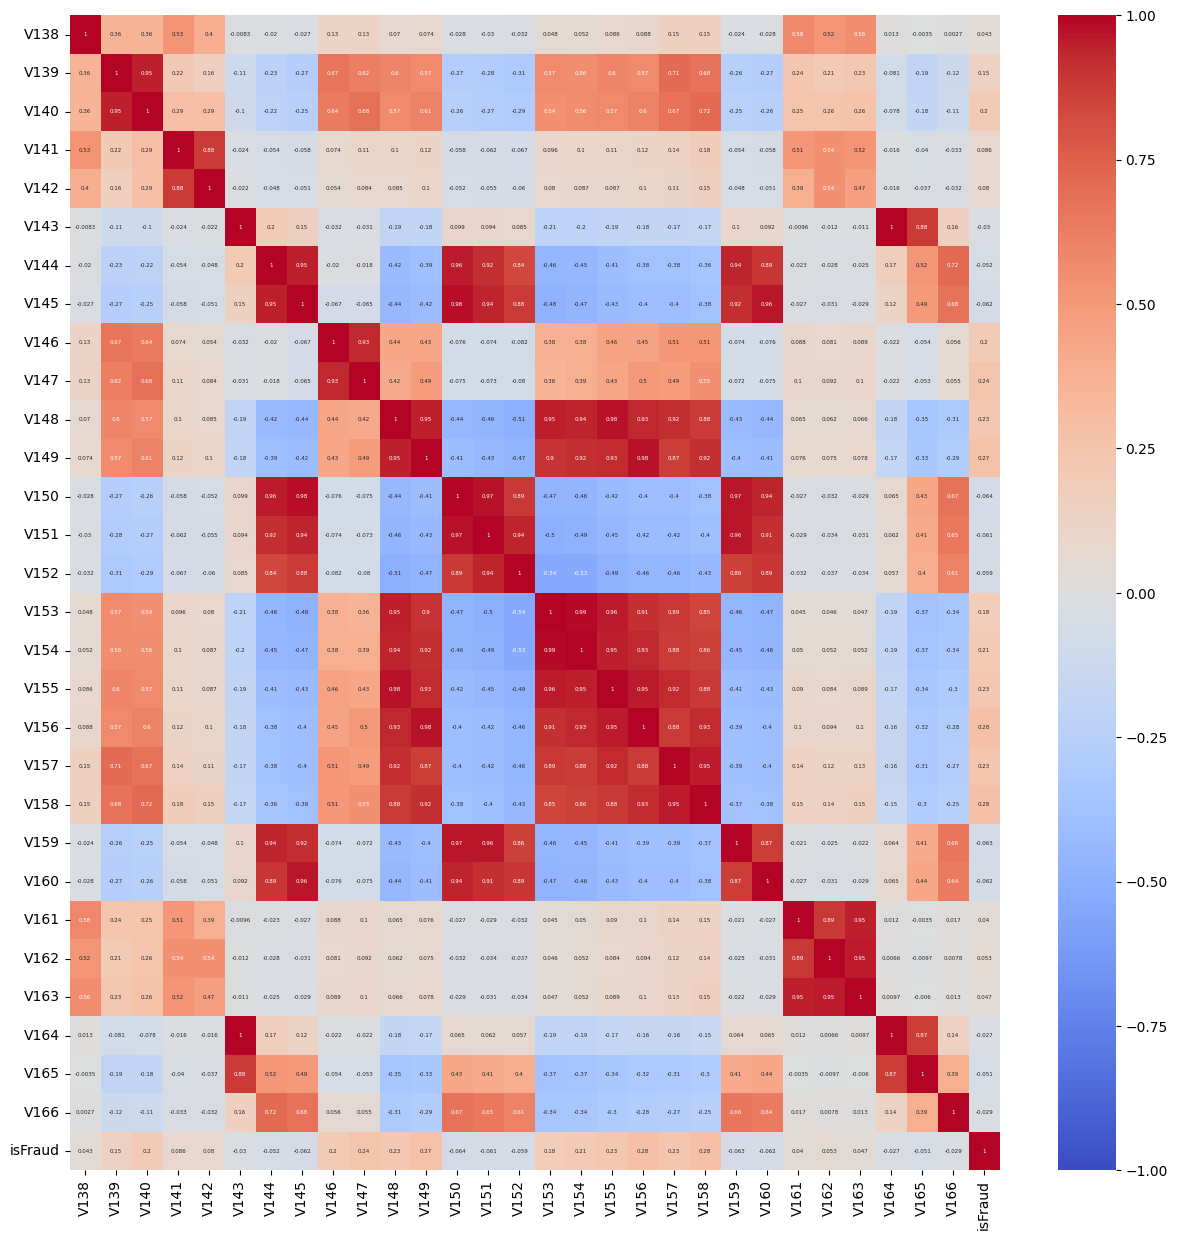

In [217]:
# Analyze the correlation within group7 of the V-columns and the isFraud label
group7_high_related, group7_corr_matrix, group7_cols_to_drop = analyze_correlation_and_prune(
    transaction, v_groups['group7'] + ['isFraud'], threshold=CORR_THRESH
)

In [200]:
# group7 columns to drop and keep
v_group7_result, v_group7_result_df = summarize_correlation_results('group7', v_groups['group7'], group7_cols_to_drop)
v_group7_result_df

Group  Total Columns  Num Dropped  \
0  group7             29           22   

                                     Dropped Columns  Num Kept  \
0  [V140, V142, V145, V146, V147, V149, V150, V15...         7   

                                 Kept Columns  
0  [V161, V143, V148, V138, V139, V141, V144]

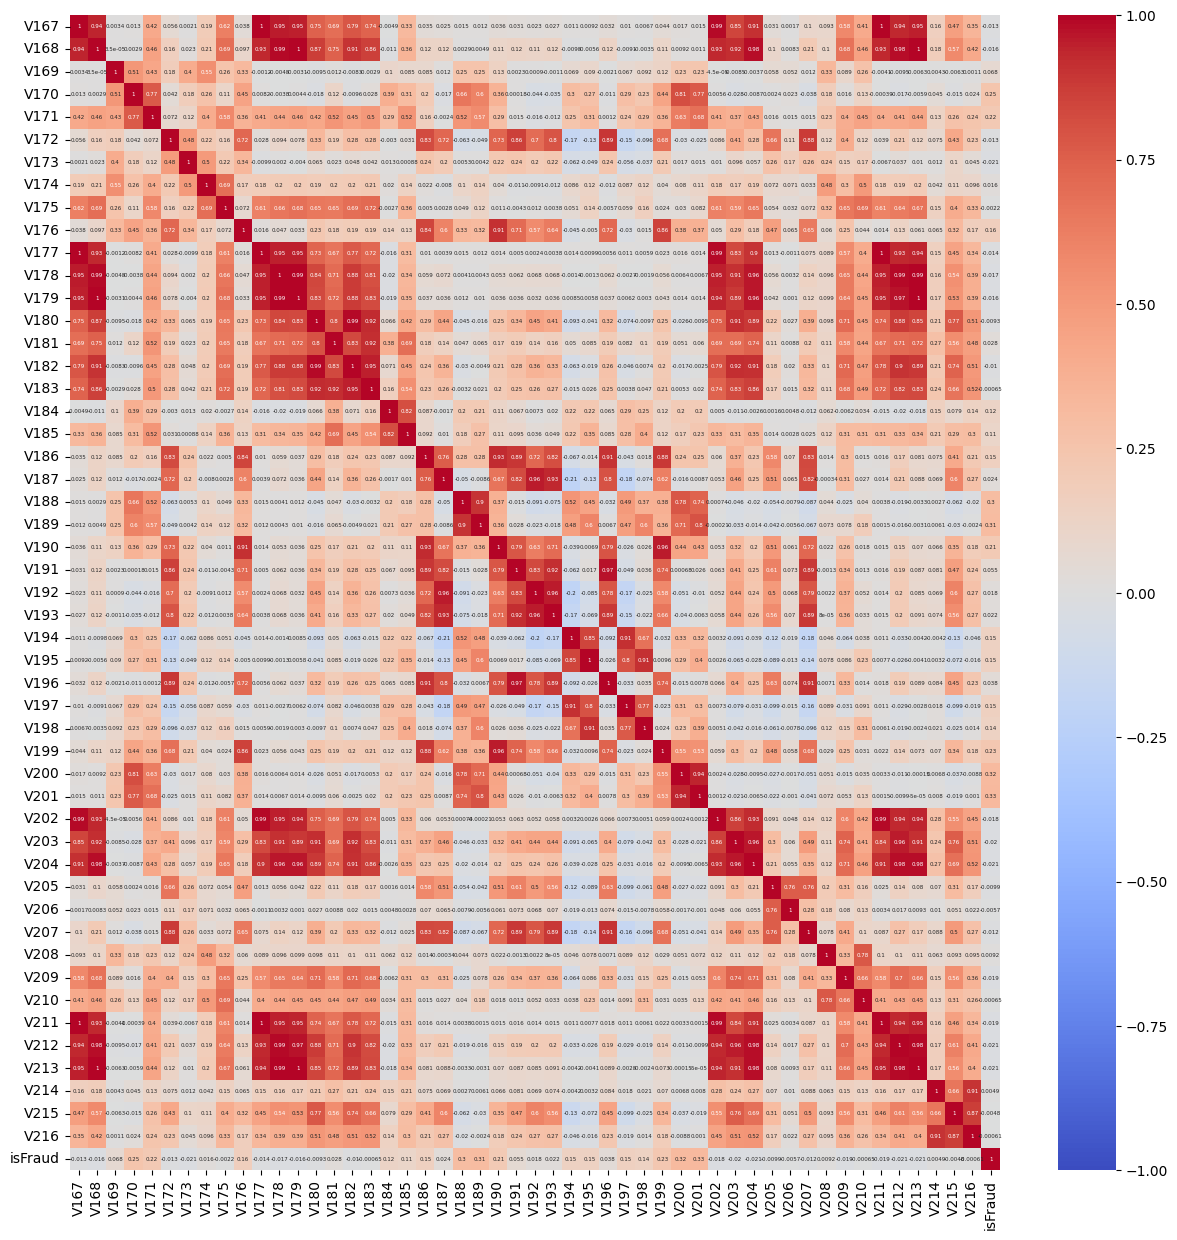

In [218]:
# Analyze the correlation within group8 of the V-columns and the isFraud label
group8_high_related, group8_corr_matrix, group8_cols_to_drop = analyze_correlation_and_prune(
    transaction, v_groups['group8'] + ['isFraud'], threshold=CORR_THRESH
)

In [202]:
# group8 columns to drop and keep
v_group8_result, v_group8_result_df = summarize_correlation_results('group8', v_groups['group8'], group8_cols_to_drop)
v_group8_result_df

Group  Total Columns  Num Dropped  \
0  group8             50           40   

                                     Dropped Columns  Num Kept  \
0  [V168, V171, V175, V176, V177, V178, V179, V18...        10   

                                        Kept Columns  
0  [V167, V169, V170, V208, V173, V184, V214, V19...

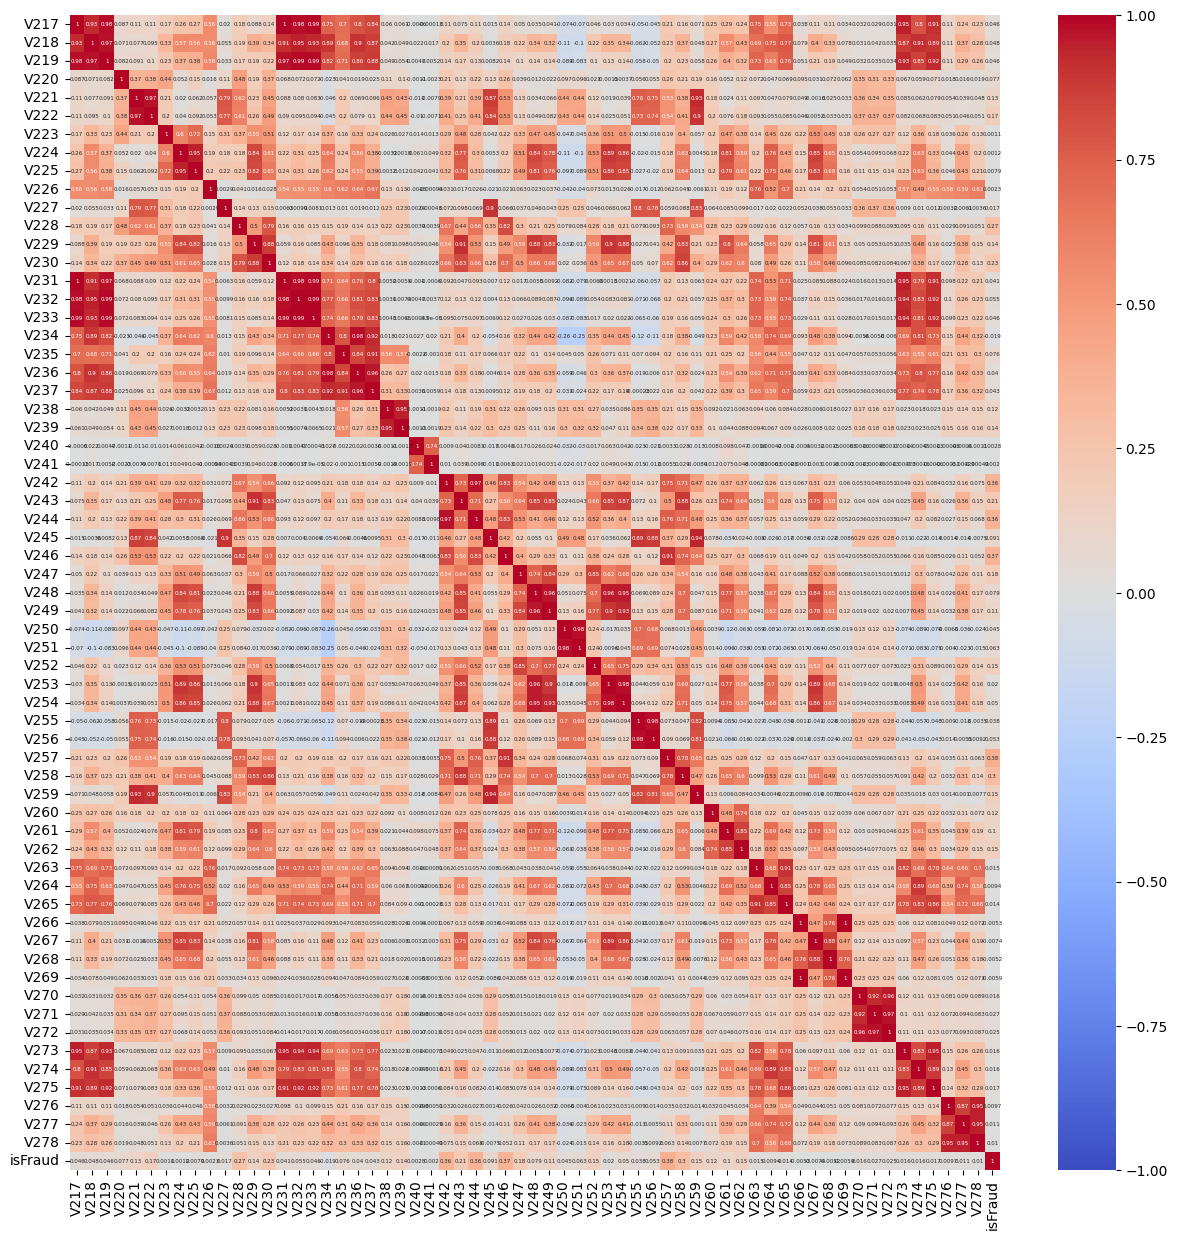

In [219]:
# Analyze the correlation within group9 of the V-columns and the isFraud label
group9_high_related, group9_corr_matrix, group9_cols_to_drop = analyze_correlation_and_prune(
    transaction, v_groups['group9'] + ['isFraud'], threshold=CORR_THRESH
)

In [204]:
# group9 columns to drop and keep
v_group9_result, v_group9_result_df = summarize_correlation_results('group9', v_groups['group9'], group9_cols_to_drop)
v_group9_result_df

Group  Total Columns  Num Dropped  \
0  group9             62           51   

                                     Dropped Columns  Num Kept  \
0  [V218, V219, V222, V224, V225, V227, V228, V22...        11   

                                        Kept Columns  
0  [V226, V260, V223, V250, V240, V221, V220, V26...

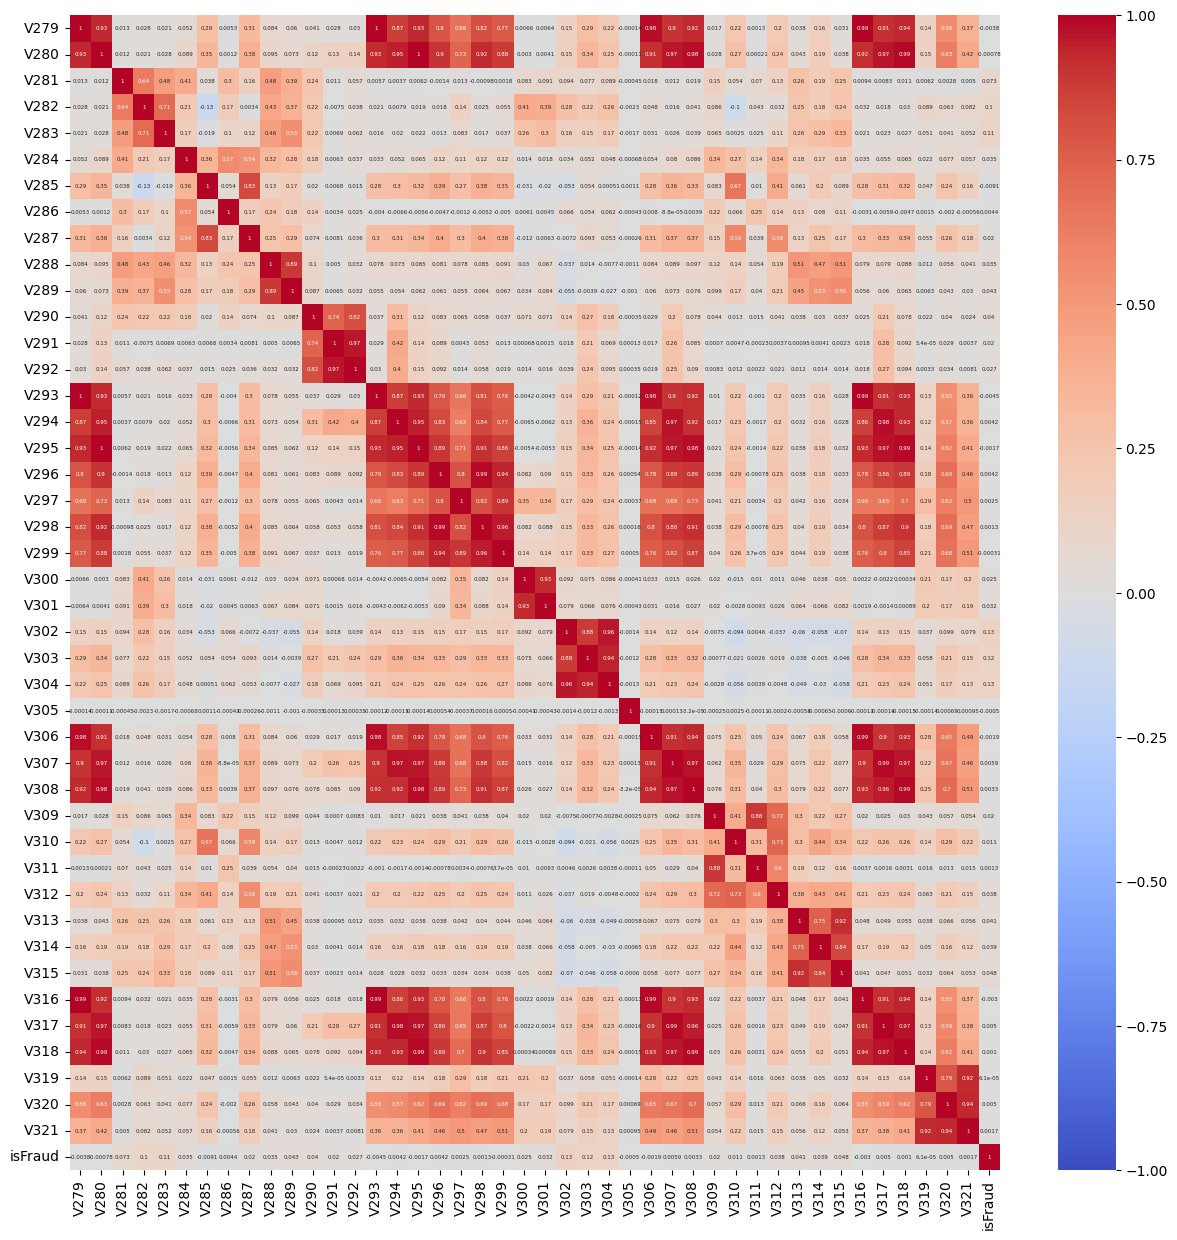

In [220]:
# Analyze the correlation within group10 of the V-columns and the isFraud label
group10_high_related, group10_corr_matrix, group10_cols_to_drop = analyze_correlation_and_prune(
    transaction, v_groups['group10'] + ['isFraud'], threshold=CORR_THRESH
)

In [206]:
# group10 columns to drop and keep
v_group10_result, v_group10_result_df = summarize_correlation_results('group10', v_groups['group10'], group10_cols_to_drop)
v_group10_result_df

Group  Total Columns  Num Dropped  \
0  group10             43           30   

                                     Dropped Columns  Num Kept  \
0  [V280, V282, V283, V287, V289, V291, V292, V29...        13   

                                        Kept Columns  
0  [V302, V290, V284, V309, V305, V279, V286, V31...

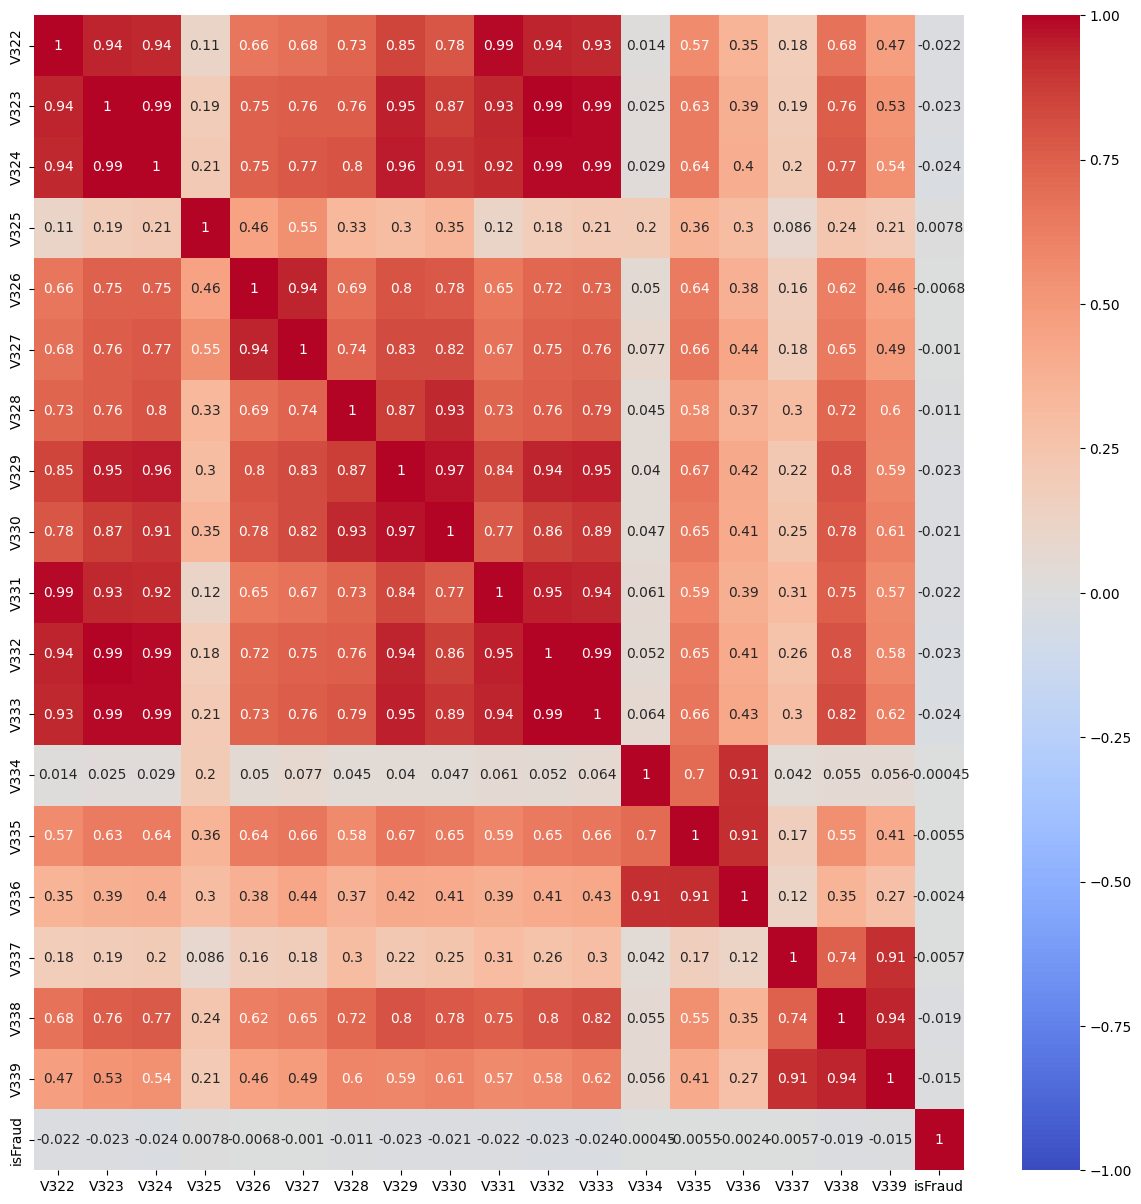

In [207]:
# Analyze the correlation within group11 of the V-columns and the isFraud label
group11_high_related, group11_corr_matrix, group11_cols_to_drop = analyze_correlation_and_prune(
    transaction, v_groups['group11'] + ['isFraud'], threshold=CORR_THRESH
)

In [208]:
# group11 columns to drop and keep
v_group11_result, v_group11_result_df = summarize_correlation_results('group11', v_groups['group11'], group11_cols_to_drop)
v_group11_result_df

Group  Total Columns  Num Dropped  \
0  group11             18           14   

                                     Dropped Columns  Num Kept  \
0  [V323, V324, V326, V327, V328, V329, V330, V33...         4   

               Kept Columns  
0  [V337, V325, V334, V322]

In [223]:
m_result

{'Group': 'M-columns',
 'Total Columns': 9,
 'Columns': ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
 'Dropped Columns': ['M3'],
 'Num Dropped': 1,
 'Kept Columns': ['M4', 'M2', 'M8', 'M6', 'M7', 'M9', 'M1', 'M5'],
 'Num Kept': 8}

In [ ]:
# Missing values with details
txn_missing_counts = transaction.isnull().sum().sort_values(ascending=False)

txn_missing_percent = (txn_missing_counts / len(transaction)) * 100

txn_missing_summary = pd.DataFrame({
    'Missing Count': txn_missing_counts,
    'Missing Percentage': txn_missing_percent
})

print(txn_missing_summary)


       Missing Count  Missing Percentage
dist2         552913           93.628374
D7            551623           93.409930
D13           528588           89.509263
D14           528353           89.469469
D12           525823           89.041047
...              ...                 ...
C10                0            0.000000
C11                0            0.000000
C12                0            0.000000
C13                0            0.000000
hour               0            0.000000

[396 rows x 2 columns]


# Feature Subset Extracted from Transaction

In [240]:
# Get seleted V-columns
v_cols_kept = [
    v_group1_result['Kept Columns'],
    v_group2_result['Kept Columns'],
    v_group3_result['Kept Columns'],
    v_group4_result['Kept Columns'],
    v_group5_result['Kept Columns'],
    v_group6_result['Kept Columns'],
    v_group7_result['Kept Columns'],
    v_group8_result['Kept Columns'],
    v_group9_result['Kept Columns'],
    v_group10_result['Kept Columns'],
    v_group11_result['Kept Columns']
]

v_cols_seleted = [col for sublist in v_cols_kept for col in sublist]
print(f"Number of V-columns are selected: {len(v_cols_seleted)} ")

Number of V-columns are selected: 90 


In [ ]:
# Get all selected columns from the transaction table

essential_cols = [
    'TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD',
    'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
    'addr1', 'addr2', 'dist1', 'dist2',
    'P_emaildomain', 'R_emaildomain'
]

combined_cols = essential_cols + v_cols_seleted + c_result['Kept Columns'] + d_result['Kept Columns'] + m_result['Kept Columns']

# Identify columns with missing data above 75%
high_missing_cols = df.columns[df.isnull().mean() > 0.75].tolist()

# Drop high missing columns
txn_cols_selected = [col for col in combined_cols if col not in high_missing_cols]

txn_cols_selected_dict = {
    'transaction_columns_selected': txn_cols_selected
}

print(f"Number of columns are selected from transaction table: {len(txn_cols_selected)} ")
print(txn_cols_selected)

# Save to file
pd.DataFrame(txn_cols_selected_dict).to_csv('processed_data/txn_cols_selected.csv', index=False)


Number of columns are selected from transaction table: 79 
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'P_emaildomain', 'V1', 'V2', 'V10', 'V4', 'V19', 'V12', 'V29', 'V25', 'V15', 'V27', 'V23', 'V14', 'V48', 'V37', 'V35', 'V39', 'V46', 'V41', 'V55', 'V65', 'V53', 'V66', 'V61', 'V57', 'V69', 'V68', 'V75', 'V90', 'V86', 'V79', 'V82', 'V88', 'V89', 'V77', 'V107', 'V108', 'V123', 'V99', 'V121', 'V95', 'V129', 'V117', 'V120', 'V135', 'V98', 'V302', 'V290', 'V284', 'V309', 'V305', 'V279', 'V286', 'V313', 'V281', 'V319', 'V300', 'V285', 'V288', 'C5', 'C1', 'C3', 'D1', 'D4', 'D3']


# Data Loading - Identity

In [254]:
identity = pd.read_csv("original_data/train_identity.csv")

In [255]:
identity.head()

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                     DeviceInfo  
0     F     T      T      mobile  SAMSUNG SM-G892A Build/NRD90M  
1     F     F      T      mobile                     iOS Device  
2     F     T      T     desktop                        Windows  
3     F     T      T     desktop                            NaN  
4     F     T      T     desktop                          MacOS  

[5 rows x 41 columns]

# Exploratory Data Analysis - Identity

In [256]:
print("Number of rows and columns in the dataset:")
identity.shape

Number of rows and columns in the dataset:


(144233, 41)

In [257]:
identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [258]:
print("Descriptive Statistics of Numerical Variables:")
identity.describe()

Descriptive Statistics of Numerical Variables:


TransactionID          id_01          id_02         id_03  \
count   1.442330e+05  144233.000000  140872.000000  66324.000000   
mean    3.236329e+06     -10.170502  174716.584708      0.060189   
std     1.788496e+05      14.347949  159651.816856      0.598231   
min     2.987004e+06    -100.000000       1.000000    -13.000000   
25%     3.077142e+06     -10.000000   67992.000000      0.000000   
50%     3.198818e+06      -5.000000  125800.500000      0.000000   
75%     3.392923e+06      -5.000000  228749.000000      0.000000   
max     3.577534e+06       0.000000  999595.000000     10.000000   

              id_04          id_05          id_06        id_07        id_08  \
count  66324.000000  136865.000000  136865.000000  5155.000000  5155.000000   
mean      -0.058938       1.615585      -6.698710    13.285354   -38.600388   
std        0.701015       5.249856      16.491104    11.384207    26.084899   
min      -28.000000     -72.000000    -100.000000   -46.000000  -100.000000   
25%        0.000000       0.000000      -6.000000     5.000000   -48.000000   
50%        0.000000       0.000000       0.000000    14.000000   -34.000000   
75%        0.000000       1.000000       0.000000    22.000000   -23.000000   
max        0.000000      52.000000       0.000000    61.000000     0.000000   

              id_09  ...          id_17         id_18          id_19  \
count  74926.000000  ...  139369.000000  45113.000000  139318.000000   
mean       0.091023  ...     189.451377     14.237337     353.128174   
std        0.983842  ...      30.375360      1.561302     141.095343   
min      -36.000000  ...     100.000000     10.000000     100.000000   
25%        0.000000  ...     166.000000     13.000000     266.000000   
50%        0.000000  ...     166.000000     15.000000     341.000000   
75%        0.000000  ...     225.000000     15.000000     427.000000   
max       25.000000  ...     229.000000     29.000000     671.000000   

               id_20        id_21        id_22        id_24        id_25  \
count  139261.000000  5159.000000  5169.000000  4747.000000  5132.000000   
mean      403.882666   368.269820    16.002708    12.800927   329.608924   
std       152.160327   198.847038     6.897665     2.372447    97.461089   
min       100.000000   100.000000    10.000000    11.000000   100.000000   
25%       256.000000   252.000000    14.000000    11.000000   321.000000   
50%       472.000000   252.000000    14.000000    11.000000   321.000000   
75%       533.000000   486.500000    14.000000    15.000000   371.000000   
max       661.000000   854.000000    44.000000    26.000000   548.000000   

             id_26         id_32  
count  5163.000000  77586.000000  
mean    149.070308     26.508597  
std      32.101995      3.737502  
min     100.000000      0.000000  
25%     119.000000     24.000000  
50%     149.000000     24.000000  
75%     169.000000     32.000000  
max     216.000000     32.000000  

[8 rows x 24 columns]

In [259]:
print("Descriptive Statistics of Categorical Variables:")
identity.describe(include=['object', 'category'])

Descriptive Statistics of Categorical Variables:


id_12   id_15   id_16                 id_23  id_27   id_28   id_29  \
count     144233  140985  129340                  5169   5169  140978  140978   
unique         2       3       2                     3      2       2       2   
top     NotFound   Found   Found  IP_PROXY:TRANSPARENT  Found   Found   Found   
freq      123025   67728   66324                  3489   5155   76232   74926   

             id_30        id_31      id_33           id_34   id_35   id_36  \
count        77565       140282      73289           77805  140985  140985   
unique          75          130        260               4       2       2   
top     Windows 10  chrome 63.0  1920x1080  match_status:2       T       F   
freq         21155        22000      16874           60011   77814  134066   

         id_37   id_38 DeviceType DeviceInfo  
count   140985  140985     140810     118666  
unique       2       2          2       1786  
top          T       F    desktop    Windows  
freq    110452   73922      85165      47722

In [260]:
# Missing values
identity.isnull().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [264]:
# Missing values with details
missing_counts = identity.isnull().sum().sort_values(ascending=False)

missing_percent = (missing_counts / len(identity)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percent
})

print(missing_summary)

               Missing Count  Missing Percentage
id_24                 139486           96.708798
id_25                 139101           96.441868
id_07                 139078           96.425922
id_08                 139078           96.425922
id_21                 139074           96.423149
id_26                 139070           96.420375
id_23                 139064           96.416215
id_27                 139064           96.416215
id_22                 139064           96.416215
id_18                  99120           68.722137
id_03                  77909           54.016071
id_04                  77909           54.016071
id_33                  70944           49.187079
id_09                  69307           48.052110
id_10                  69307           48.052110
id_30                  66668           46.222432
id_32                  66647           46.207872
id_34                  66428           46.056034
id_14                  64189           44.503685
DeviceInfo          

In [265]:
i_num_cols = identity.select_dtypes(include=['int64', 'float64']).columns
i_cat_cols = identity.select_dtypes(include=['object', 'category']).columns

In [268]:
# # for testing purpose only, to be removed
df_i = identity.sample(frac=0.001, random_state=42)

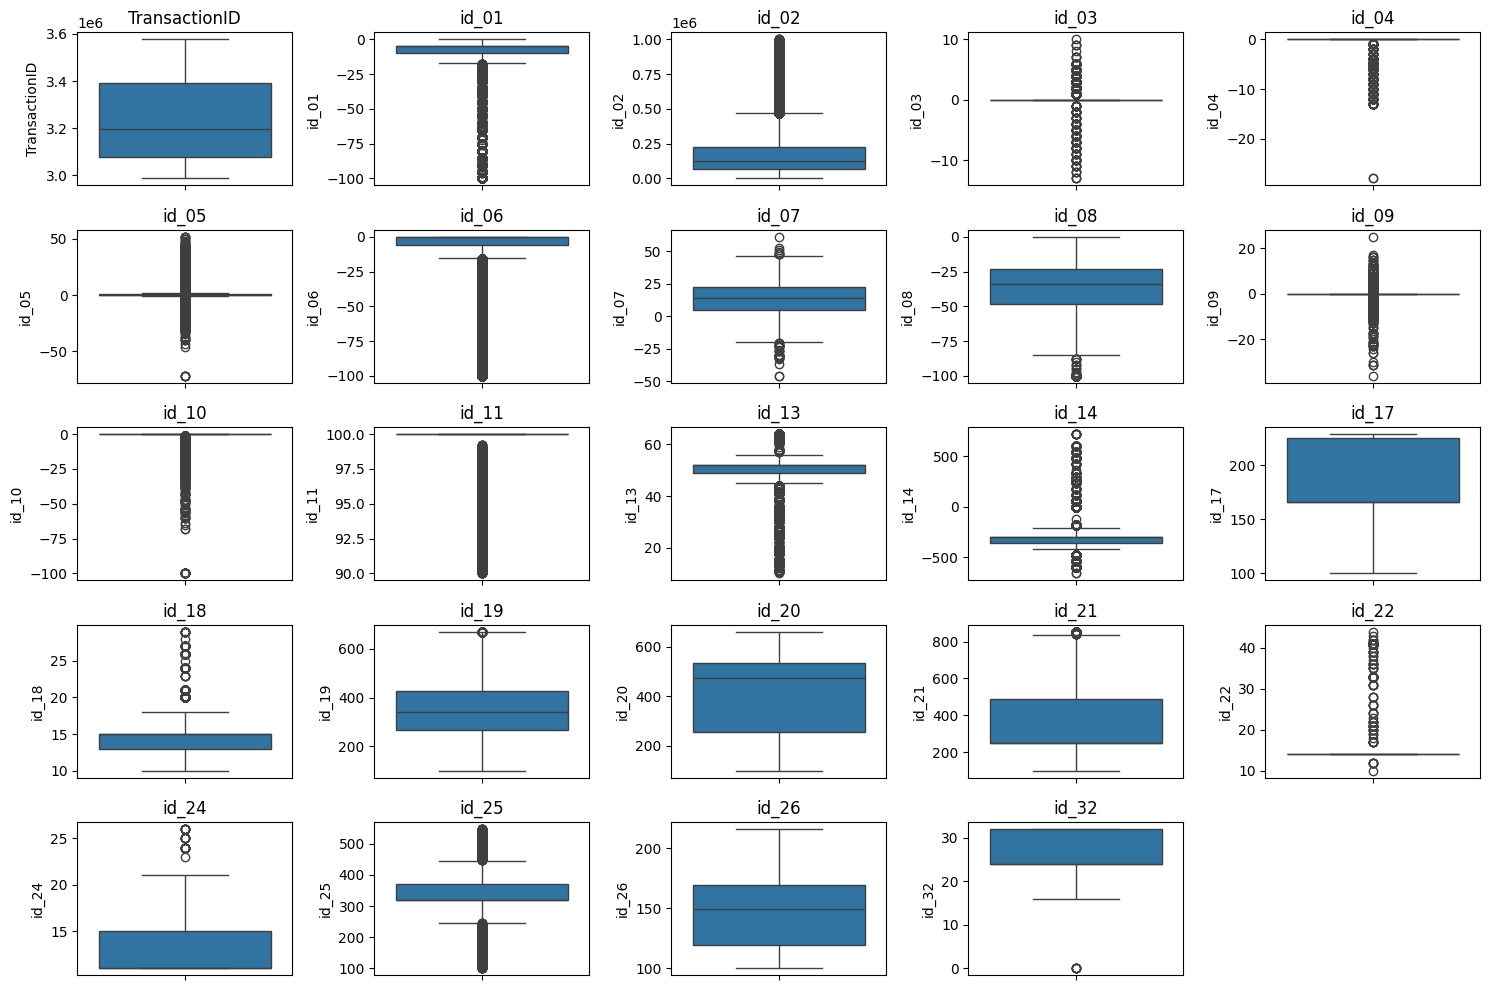

In [272]:
# Use box plots to visualize outliers in numerical features
fig, axes = plt.subplots(5, 5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(i_num_cols):
    sns.boxplot(data=identity, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Turn off remaining axes
for j in range(len(i_num_cols), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()

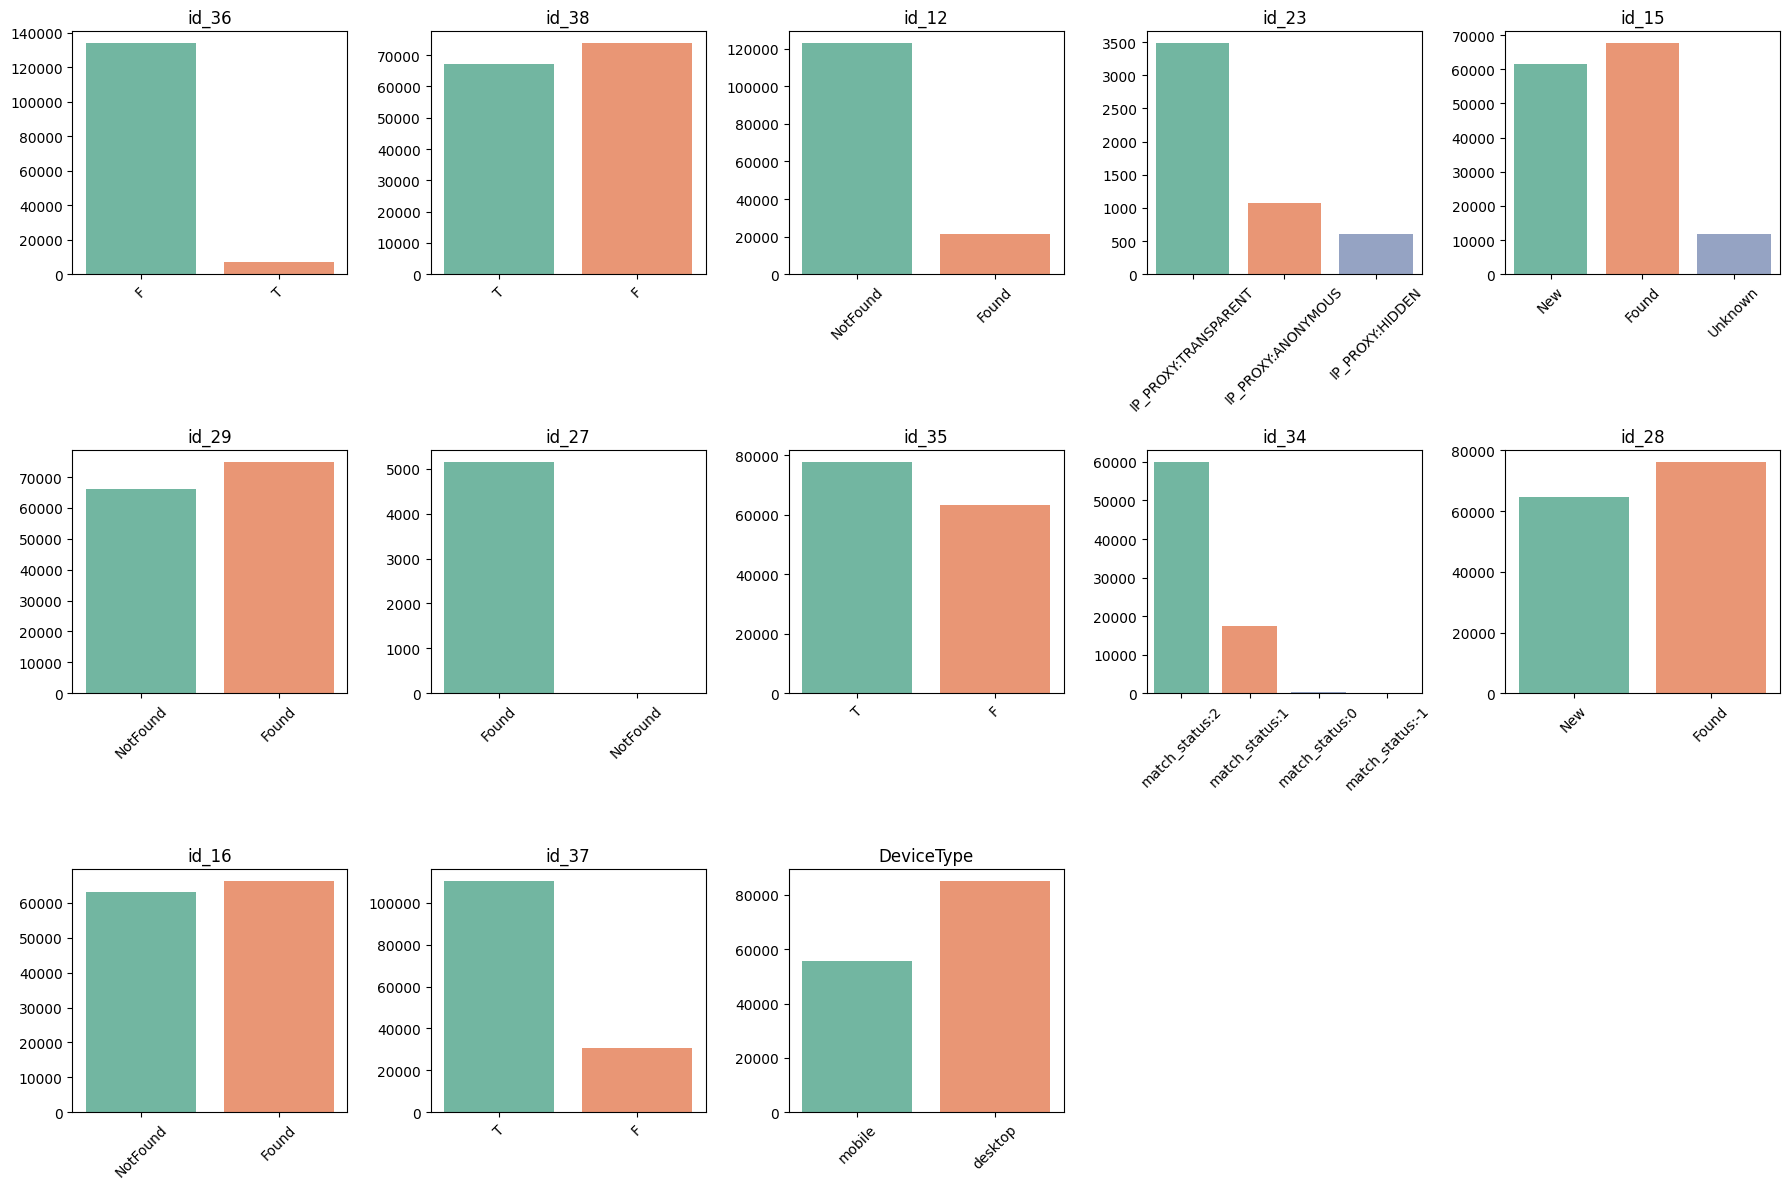

In [ ]:
# Distribution of categorical features 
# except id_30, id_31, id_33, DeviceInfo which has too many unique labels
i_cat_cols_part = list(set(i_cat_cols) - set(['id_30', 'id_31', 'id_33', 'DeviceInfo']))
fig, axes = plt.subplots(3, 5, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(i_cat_cols_part):
    sns.countplot(data=identity, x=col, hue=col, ax=axes[i], palette='Set2', legend=False)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45) 

# Turn off remaining axes
for j in range(len(i_cat_cols_part), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()

#### <span style="color:green; font-weight:bold;"> Insigts: </span>

- The boxplots reveal that nearly all numerical features exhibit numerous outliers, with the exception of id_17, id_20, and id_26.

- The bar plots for categorical features illustrate label distributions but provide limited actionable insights.

- Several columns have a substantial proportion of missing values—exceeding 96% — and will therefore be removed from the dataset.

# Feature Subset Extracted from Identity

In [326]:
identity_cols = identity.columns.tolist()

# Identify columns with missing data above 96%
identity_high_missing_cols = identity.columns[identity.isnull().mean() > 0.96].tolist()

# Drop high missing columns
identity_cols_selected = [col for col in identity_cols if col not in identity_high_missing_cols]

identity_cols_selected_dict = {
    'identity_columns_selected': identity_cols_selected
}

print(f"Number of columns are selected from identity table: {len(identity_cols_selected)} ")
print(identity_cols_selected)

# Save to file
pd.DataFrame(identity_cols_selected_dict).to_csv('processed_data/identity_cols_selected.csv', index=False)

Number of columns are selected from identity table: 32 
['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [327]:
id_cols = pd.read_csv("processed_data/identity_cols_selected.csv")

In [328]:
id_cols['identity_columns_selected'].values

array(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05',
       'id_06', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype=object)

In [329]:
df_id = pd.read_csv("original_data/train_identity.csv", usecols = id_cols['identity_columns_selected'].values)

In [330]:
df_id.shape

(144233, 32)

In [331]:
txn_cols = pd.read_csv("processed_data/txn_cols_selected.csv")

In [332]:
df_txn = pd.read_csv("original_data/train_transaction.csv", usecols = txn_cols['transaction_columns_selected'].values)

In [333]:
df_txn.shape

(590540, 79)

In [334]:

df_all = pd.merge(df_txn, df_id, how = "left", on = 'TransactionID')

In [335]:
df_all.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   

       id_33           id_34 id_35  id_36  id_37  id_38  DeviceType  \
0        NaN             NaN   NaN    NaN    NaN    NaN         NaN   
1        NaN             NaN   NaN    NaN    NaN    NaN         NaN   
2        NaN             NaN   NaN    NaN    NaN    NaN         NaN   
3        NaN             NaN   NaN    NaN    NaN    NaN         NaN   
4  2220x1080  match_status:2     T      F      T      T      mobile   

                      DeviceInfo  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4  SAMSUNG SM-G892A Build/NRD90M  

[5 rows x 110 columns]

# Feature Engineering

In [343]:
# Numerical and categorical columns in the merged dataset
target_col = 'isFraud' 
numerical_columns = df_all.select_dtypes(include=['int64', 'float64']).columns.drop(target_col)
categorical_columns = df_all.select_dtypes(include=['object', 'category']).columns

In [344]:
print(numerical_columns)

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'dist1', 'C1', 'C3', 'C5', 'D1',
       'D3', 'D4', 'V1', 'V2', 'V4', 'V10', 'V12', 'V14', 'V15', 'V19', 'V23',
       'V25', 'V27', 'V29', 'V35', 'V37', 'V39', 'V41', 'V46', 'V48', 'V53',
       'V55', 'V57', 'V61', 'V65', 'V66', 'V68', 'V69', 'V75', 'V77', 'V79',
       'V82', 'V86', 'V88', 'V89', 'V90', 'V95', 'V98', 'V99', 'V107', 'V108',
       'V117', 'V120', 'V121', 'V123', 'V129', 'V135', 'V279', 'V281', 'V284',
       'V285', 'V286', 'V288', 'V290', 'V300', 'V302', 'V305', 'V309', 'V313',
       'V319', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_09',
       'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_32'],
      dtype='object')


In [345]:
print(categorical_columns)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'id_12', 'id_15',
       'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')


In [362]:
a = df_all.sample(frac=0.001, random_state=42)

In [354]:
df_all.sample(10)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
319536        3306536        0        7943000         106.037         C   
419801        3406801        0       10622273          59.000         W   
286445        3273445        0        7048809          56.950         W   
270272        3257272        0        6555125         115.000         W   
573323        3560323        0       15222557          31.950         W   
311699        3298699        0        7761308          58.950         W   
537687        3524687        0       14164823         947.000         W   
69255         3056255        0        1555559         100.000         R   
130929        3117929        0        2591407          29.000         W   
394965        3381965        0        9925821          59.000         W   

        card1  card2  card3       card4  card5  ...                    id_31  \
319536  15885  545.0  185.0        visa  138.0  ...  samsung browser generic   
419801   9500  321.0  150.0        visa  226.0  ...                      NaN   
286445   1804  161.0  150.0  mastercard  117.0  ...                      NaN   
270272   1137  543.0  150.0  mastercard  224.0  ...                      NaN   
573323  12577  268.0  150.0        visa  166.0  ...                      NaN   
311699   2704  111.0  150.0  mastercard  117.0  ...                      NaN   
537687   8987  436.0  150.0        visa  226.0  ...                      NaN   
69255    4753  181.0  150.0        visa  162.0  ...                edge 15.0   
130929   9323  111.0  150.0        visa  226.0  ...                      NaN   
394965  12173  555.0  150.0        visa  226.0  ...                      NaN   

        id_32     id_33           id_34 id_35  id_36  id_37  id_38  \
319536    NaN       NaN             NaN     F      F      T      F   
419801    NaN       NaN             NaN   NaN    NaN    NaN    NaN   
286445    NaN       NaN             NaN   NaN    NaN    NaN    NaN   
270272    NaN       NaN             NaN   NaN    NaN    NaN    NaN   
573323    NaN       NaN             NaN   NaN    NaN    NaN    NaN   
311699    NaN       NaN             NaN   NaN    NaN    NaN    NaN   
537687    NaN       NaN             NaN   NaN    NaN    NaN    NaN   
69255    24.0  1366x768  match_status:2     T      F      T      T   
130929    NaN       NaN             NaN   NaN    NaN    NaN    NaN   
394965    NaN       NaN             NaN   NaN    NaN    NaN    NaN   

        DeviceType                     DeviceInfo  
319536      mobile  SAMSUNG SM-A730F Build/NMF26X  
419801         NaN                            NaN  
286445         NaN                            NaN  
270272         NaN                            NaN  
573323         NaN                            NaN  
311699         NaN                            NaN  
537687         NaN                            NaN  
69255      desktop                        Windows  
130929         NaN                            NaN  
394965         NaN                            NaN  

[10 rows x 110 columns]

### Handling Missing Values

In [427]:
# Replace NAN with -1 in numerical columns
df_all[numerical_columns] = df_all[numerical_columns].fillna(-1)

In [428]:
# Replace NAN with 'missing' in categorical columns
df_all[categorical_columns] = df_all[categorical_columns].fillna('missing')

In [365]:
a.sample(10)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
424764        3411764        0       10760601           57.95         W   
246634        3233634        0        5866596          107.95         W   
221642        3208642        0        5218640           77.95         W   
322841        3309841        0        8012474         1090.19         W   
29763         3016763        0         754967           24.50         W   
53892         3040892        0        1270637           50.00         H   
282893        3269893        0        6905020          335.00         W   
183647        3170647        0        4061709           43.95         W   
433710        3420710        0       10964381           21.95         W   
476783        3463783        0       12342035           47.95         W   

        card1  card2  card3       card4  card5  ...              id_31  id_32  \
424764   2157  111.0  150.0        visa  226.0  ...            missing   -1.0   
246634   9705  555.0  150.0  mastercard  224.0  ...            missing   -1.0   
221642  11157  215.0  150.0        visa  226.0  ...            missing   -1.0   
322841  18238  361.0  150.0        visa  226.0  ...            missing   -1.0   
29763   10776  512.0  150.0        visa  166.0  ...            missing   -1.0   
53892   16075  514.0  150.0  mastercard  102.0  ...  mobile safari 9.0   32.0   
282893  17343  555.0  150.0  mastercard  117.0  ...            missing   -1.0   
183647   4200  188.0  150.0        visa  195.0  ...            missing   -1.0   
433710   9749  181.0  150.0        visa  226.0  ...            missing   -1.0   
476783   7005  111.0  150.0        visa  226.0  ...            missing   -1.0   

           id_33           id_34    id_35    id_36    id_37    id_38  \
424764   missing         missing  missing  missing  missing  missing   
246634   missing         missing  missing  missing  missing  missing   
221642   missing         missing  missing  missing  missing  missing   
322841   missing         missing  missing  missing  missing  missing   
29763    missing         missing  missing  missing  missing  missing   
53892   1024x768  match_status:1        T        F        F        T   
282893   missing         missing  missing  missing  missing  missing   
183647   missing         missing  missing  missing  missing  missing   
433710   missing         missing  missing  missing  missing  missing   
476783   missing         missing  missing  missing  missing  missing   

        DeviceType  DeviceInfo  
424764     missing     missing  
246634     missing     missing  
221642     missing     missing  
322841     missing     missing  
29763      missing     missing  
53892       mobile  iOS Device  
282893     missing     missing  
183647     missing     missing  
433710     missing     missing  
476783     missing     missing  

[10 rows x 110 columns]

### Preprocessing Categorical Columns

In [368]:
# Find categorical columns with a large variety of distinct labels
cat_summary = [
    {
        'Column': col,
        'Num Unique Labels': df_all[col].nunique(),
        'Labels': df_all[col].unique().tolist()
    }
    for col in categorical_columns
]

# Convert to DataFrame and sort by number of unique labels
cat_summary_df = pd.DataFrame(cat_summary).sort_values(by='Num Unique Labels', ascending=False)

# Display
print(cat_summary_df)

           Column  Num Unique Labels  \
18     DeviceInfo               1786   
11          id_33                260   
10          id_31                130   
9           id_30                 75   
3   P_emaildomain                 59   
0       ProductCD                  5   
1           card4                  4   
2           card6                  4   
12          id_34                  4   
5           id_15                  3   
4           id_12                  2   
6           id_16                  2   
7           id_28                  2   
8           id_29                  2   
13          id_35                  2   
14          id_36                  2   
15          id_37                  2   
16          id_38                  2   
17     DeviceType                  2   

                                               Labels  
18  [nan, SAMSUNG SM-G892A Build/NRD90M, iOS Devic...  
11  [nan, 2220x1080, 1334x750, 1280x800, 1366x768,...  
10  [nan, samsung browser 6.2, 

#### High-Cardinality Categorical Columns
These five categorical features have a wide range of unique values, requiring preprocessing prior to label encoding.
- DeviceInfo
- id_33
- id_31
- id_30
- P_emaildomain


#### id_33

In [369]:
df_all['id_33'].unique()

array([nan, '2220x1080', '1334x750', '1280x800', '1366x768', '1920x1080',
       '1680x1050', '1136x640', '5120x2880', '2880x1800', '1920x1200',
       '2560x1600', '2048x1536', '1024x768', '1280x720', '2560x1440',
       '2208x1242', '2001x1125', '1440x900', '1600x900', '2672x1440',
       '1280x1024', '960x540', '2732x2048', '2436x1125', '2048x1152',
       '2960x1440', '1024x600', '855x480', '4096x2304', '2160x1440',
       '2562x1442', '801x480', '2736x1824', '3441x1440', '2880x1620',
       '3840x2160', '1638x922', '1280x768', '1360x768', '1280x960',
       '3440x1440', '1152x720', '1280x1025', '3360x2100', '2304x1296',
       '1152x864', '3200x1800', '2112x1188', '2224x1668', '2400x1350',
       '2000x1125', '1600x1000', '2560x1080', '1728x972', '3000x2000',
       '1024x640', '3840x2400', '2304x1440', '1280x600', '1400x1050',
       '1600x1200', '3201x1800', '1356x900', '1344x756', '1624x1080',
       '1536x864', '1800x1125', '1920x1281', '2961x1442', '1366x1024',
       '1344x8

id_33 appears to relate to screen resolution. Since resolution is unlikely to be a significant factor in fraud detection, we choose to drop this feature.

In [ ]:
# Drop id_33 for the aforementioned reason
df_all = df_all.drop(columns='id_33')  


KeyError: "['id_33'] not found in axis"

#### id_31

In [372]:
df_all['id_31'].unique()

array([nan, 'samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0',
       'chrome 62.0 for android', 'edge 15.0', 'mobile safari generic',
       'chrome 49.0', 'chrome 61.0', 'edge 16.0', 'safari generic',
       'edge 14.0', 'chrome 56.0 for android', 'firefox 57.0',
       'chrome 54.0 for android', 'mobile safari uiwebview', 'chrome',
       'chrome 62.0 for ios', 'firefox', 'chrome 60.0 for android',
       'mobile safari 10.0', 'chrome 61.0 for android',
       'ie 11.0 for desktop', 'ie 11.0 for tablet', 'mobile safari 9.0',
       'chrome generic', 'other', 'chrome 59.0 for android',
       'firefox 56.0', 'android webview 4.0', 'chrome 55.0', 'opera 49.0',
       'ie', 'chrome 55.0 for android', 'firefox 52.0',
       'chrome 57.0 for android', 'chrome 56.0',
       'chrome 46.0 for android', 'chrome 58.0', 'firefox 48.0',
       'chrome 59.0', 'samsung browser 4.0', 'edge 13.0',
       'chrome 53.0 for android', 'chrome 58.0 for android',
       'chrome 60.0', 'mobile sa

In [ ]:
df_all['id_31'] = df_all['id_31'].str.replace(r'\d+', '', regex=True)

In [ ]:
df_all['id_31'].unique()

array(['missing', 'chrome generic', 'mobile safari .', 'chrome .',
       'chrome . for android', 'safari generic', 'mobile safari generic',
       'edge .', 'safari .', 'ie . for tablet', 'ie . for desktop',
       'samsung browser .', 'opera generic', 'firefox .'], dtype=object)

In [ ]:
# Define mapping of substrings to categories
browser_map = {
    'chrome': 'chrome',
    'edge': 'edge',
    'android': 'android',
    'google': 'google',
    'safari': 'safari',
    'ie': 'ie',
    'samsung': 'samsung',
    'firefox': 'firefox',
    'opera': 'opera'
}

# Normalize 'id_31' to lowercase to simplify matching
df_all['id_31'] = df_all['id_31'].str.lower()

# Apply mapping
for keyword, label in browser_map.items():
    df_all.loc[df_all['id_31'].str.contains(keyword, na=False), 'id_31'] = label

In [ ]:
# Lowered label cardinality after preprocessing
df_all['id_31'].unique()

array([nan, 'samsung', 'safari', 'chrome', 'iOS', 'firefox', 'ie',
       'other', 'android', 'opera', 'mobile', 'aol', 'silk', 'waterfox',
       'nokia/lumia', 'puffin', 'microsoft/windows', 'cyberfox',
       'zte/blade', 'palemoon', 'maxthon', 'line', 'lg/k-200', 'iron',
       'blu/dash', 'seamonkey', 'm4tel/m4', 'comodo', 'lanix/ilium',
       'chromium', 'inco/minion', 'cherry', 'icedragon', 'google',
       'facebook'], dtype=object)

#### id_30

In [380]:
df_all['id_30'].unique()

array([nan, 'Android 7.0', 'iOS 11.1.2', 'Mac OS X 10_11_6', 'Windows 10',
       'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5',
       'iOS 9.3.5', 'Android 5.1.1', 'Android 7.1.1', 'Android 6.0',
       'iOS 10.3.1', 'Mac OS X 10.9', 'iOS 11.1.1', 'Windows Vista',
       'iOS 10.3.2', 'iOS 11.0.2', 'Mac OS X 10.11', 'Android 8.0.0',
       'iOS 10.2.0', 'iOS 10.2.1', 'iOS 11.0.0', 'Mac OS X 10.10',
       'Mac OS X 10_12_3', 'Mac OS X 10_12', 'Android 6.0.1', 'iOS',
       'Mac OS X 10.13', 'Mac OS X 10_12_5', 'Mac OS X 10_8_5',
       'iOS 11.0.1', 'iOS 10.0.2', 'Android 5.0.2', 'Windows XP',
       'iOS 11.2.0', 'Mac OS X 10.6', 'Windows 8', 'Mac OS X 10_6_8',
       'Mac OS X 10_11_4', 'Mac OS X 10_12_1', 'iOS 10.1.1',
       'Mac OS X 10_11_3', 'Mac OS X 10_12_4', 'Mac OS X 10

In [383]:
# Define simplified OS mappings
os_map = {
    'mac': ['Mac'],
    'iOS': ['iOS'],
    'android': ['Android'],
    'Windows': ['Windows'],
    'Linux': ['Linux']
}

# Normalize 'id_30' values based on the mapping
for os_label, keywords in os_map.items():
    pattern = '|'.join(keywords)
    df_all.loc[df_all['id_30'].str.contains(pattern, na=False, case=False), 'id_30'] = os_label

In [384]:
# Lowered label cardinality after preprocessing
df_all['id_30'].unique()

array([nan, 'android', 'iOS', 'mac', 'Windows', 'Linux', 'func', 'other'],
      dtype=object)

#### P_emaildomain

In [388]:
df_all['P_emaildomain'].unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [389]:
df_all['P_emaildomain'] = df_all['P_emaildomain'].str.extract(r'^([^.@]+)', expand=False)

In [391]:
df_all['P_emaildomain'].unique()

array([nan, 'gmail', 'outlook', 'yahoo', 'mail', 'anonymous', 'hotmail',
       'verizon', 'aol', 'me', 'comcast', 'optonline', 'cox', 'charter',
       'rocketmail', 'prodigy', 'embarqmail', 'icloud', 'live', 'att',
       'juno', 'ymail', 'sbcglobal', 'bellsouth', 'msn', 'q',
       'centurylink', 'servicios-ta', 'earthlink', 'cfl', 'roadrunner',
       'netzero', 'gmx', 'suddenlink', 'frontiernet', 'windstream',
       'frontier', 'mac', 'aim', 'web', 'twc', 'cableone', 'sc', 'ptd',
       'protonmail'], dtype=object)

#### DeviceInfo

In [396]:
df_all['DeviceInfo'].unique()

array([nan, 'SAMSUNG SM-G892A Build/NRD90M', 'iOS Device', ...,
       'LDN-LX3 Build/HUAWEILDN-LX3', 'Z955A', 'LG-E975'], dtype=object)

In [397]:
df_all['DeviceInfo'].str.split('/', expand=True)[0]

0                            NaN
1                            NaN
2                            NaN
3                            NaN
4         SAMSUNG SM-G892A Build
                   ...          
590535                       NaN
590536                       NaN
590537                       NaN
590538                       NaN
590539                       NaN
Name: 0, Length: 590540, dtype: object

In [398]:
df_all['DeviceInfo'] = df_all['DeviceInfo'].str.split('/', n=1).str[0]

In [399]:
df_all['DeviceInfo'].unique()

array([nan, 'SAMSUNG SM-G892A Build', 'iOS Device', ..., 'LDN-LX3 Build',
       'Z955A', 'LG-E975'], dtype=object)

In [400]:
from sklearn.preprocessing import LabelEncoder

# Function for label encoding all categorical columns
def label_encode_columns(data, cat_columns):
    le = LabelEncoder()
    for col in cat_columns:
        if data[col].dtype == 'object':  # Only encode categorical columns
            # Handle missing values by filling them with a placeholder if needed
            data[col] = data[col].fillna('missing')
            data[col] = le.fit_transform(data[col])
    return data



In [404]:
categorical_columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'id_12', 'id_15',
       'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [405]:
print(type(categorical_columns))

<class 'pandas.core.indexes.base.Index'>


In [408]:
# Label encode categorical columns
df_all = label_encode_columns(df_all, categorical_columns)
df_all.head()

TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD  card1  \
0        2987000        0          86400            68.5          4  13926   
1        2987001        0          86401            29.0          4   2755   
2        2987002        0          86469            59.0          4   4663   
3        2987003        0          86499            50.0          4  18132   
4        2987004        0          86506            50.0          1   4497   

   card2  card3  card4  card5  ...  id_30  id_31  id_32  id_34  id_35  id_36  \
0    NaN  150.0      1  142.0  ...      6     22    NaN      4      2      2   
1  404.0  150.0      2  102.0  ...      6     22    NaN      4      2      2   
2  490.0  150.0      4  166.0  ...      6     22    NaN      4      2      2   
3  567.0  150.0      2  117.0  ...      6     22    NaN      4      2      2   
4  514.0  150.0      2  102.0  ...      2     30   32.0      3      1      0   

   id_37  id_38  DeviceType  DeviceInfo  
0      2      2           1        1527  
1      2      2           1        1527  
2      2      2           1        1527  
3      2      2           1        1527  
4      1      1           2         838  

[5 rows x 109 columns]

In [409]:
pd.DataFrame(df_all).to_csv('df_all.csv')

In [431]:
df_all_sample = df_all.sample(frac=0.01, random_state=42)

In [432]:
# Define the features (X) and the target variable (y)
X = df_all_sample.drop(columns=['isFraud'])  
y = df_all_sample['isFraud']

In [411]:
from sklearn.model_selection import train_test_split


In [433]:
# Split the dataset into training (train) and testing (test) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [434]:
# Check the size of the sets
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (4724, 108). Training labels size: (4724,)
Test set size: (1181, 108). Test labels size: (1181,)


In [414]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Baseline accuracy: 0.93
Baseline precision: 0.05
Baseline recall: 0.05
Baseline F1: 0.05


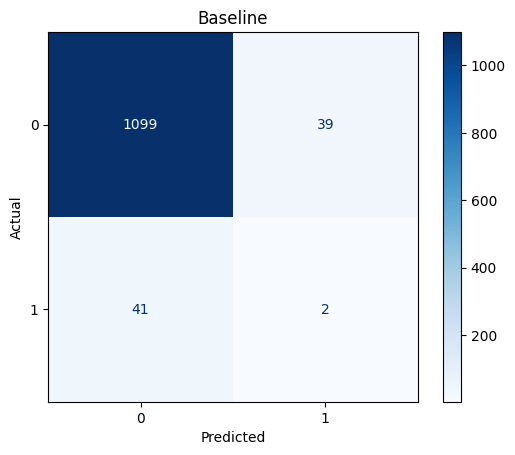

In [435]:
random_baseline = DummyClassifier(strategy="stratified")  
random_baseline.fit(X_train, y_train)
y_random_pred = random_baseline.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_random_pred)
baseline_precision = precision_score(y_test, y_random_pred, average='binary', zero_division=0)
baseline_recall = recall_score(y_test, y_random_pred, average='binary', zero_division=0)
baseline_f1 = f1_score(y_test, y_random_pred, average='binary', zero_division=0)
cm = confusion_matrix(y_test, y_random_pred)

print(f"Baseline accuracy: {baseline_accuracy:.2f}")
print(f"Baseline precision: {baseline_precision:.2f}")
print(f"Baseline recall: {baseline_recall:.2f}")
print(f"Baseline F1: {baseline_f1:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Baseline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [420]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [436]:
# Basic Logistic Regression model
model = LogisticRegression()

# Create a dictionary to store metrics
results = {}

# Perform cross-validation on the training set
cv_scores = cross_val_score(
    model,
    X_train,
    y_train,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available processors for faster computation
)

# Train the model on the full training set
model.fit(X_train, y_train)

# Store the results in the dictionary
results['Logistic Regression'] = {
    'Cross-Validation Accuracy (mean)': cv_scores.mean(),
    'Cross-Validation Accuracy (std)': cv_scores.std(),
}

# Display the results
results_df = pd.DataFrame(results).T
results_df

/Users/jungao/AI-Berkeley/solutions-resources/ai-berkely-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jungao/AI-Berkeley/solutions-resources/ai-berkely-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver option

Cross-Validation Accuracy (mean)  \
Logistic Regression                          0.964225   

                     Cross-Validation Accuracy (std)  
Logistic Regression                         0.000408

In [437]:
# Create a dictionary to store metrics
results = {}

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Store the results in the dictionary
results['Logistic Regression'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Confusion Matrix': confusion_mat
}

                    Accuracy Precision Recall F1-Score
Logistic Regression  0.96359       0.0    0.0      0.0


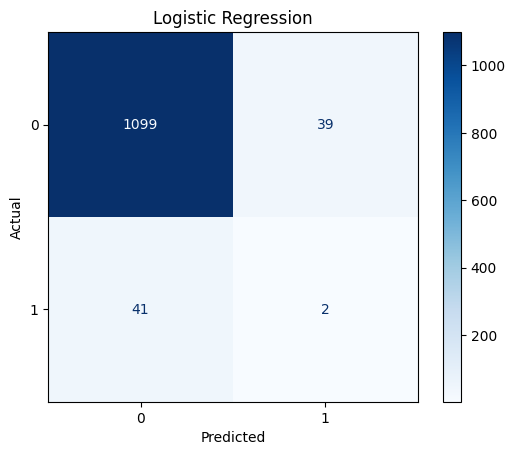

In [438]:
# Display metrics
metrics_df = pd.DataFrame(results).T.drop(columns='Confusion Matrix')
print(metrics_df)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [439]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import math
import time

In [442]:
# Create a list of models to train
from sklearn.tree import DecisionTreeClassifier


models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),  
    'Logistic Regression': LogisticRegression(random_state=42),
}

In [ ]:
# Create a dictionary to store metrics
results = {}

# Train each model with cross-validation
for model_name, model in models.items():
    print(f"Training and evaluating {model_name} with cross-validation...")

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(
        model,
        X_train,
        y_train,
        scoring='accuracy',
        cv=5,  # 5-fold cross-validation
        n_jobs=-1  # Use all available processors for faster computation
    )

    # Fit the model and time it
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time

    # Predict on training and testing data
    train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # Calcuate metrics
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Store the results in the dictionary
    results[model_name] = {
        'Train Time': fit_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Test Precision': precision,
        'Test Recall': recall,
        'Test F1-Score': f1,
        'Confusion Matrix': confusion_mat
    }

Training and evaluating KNN with cross-validation...
Training and evaluating Logistic Regression with cross-validation...


/Users/jungao/AI-Berkeley/solutions-resources/ai-berkely-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jungao/AI-Berkeley/solutions-resources/ai-berkely-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver option